In [1]:
# Importing necessary libraries to look at the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## EDA
---

1. We do not need new fields, these fields are sufficient. But we might add more to compare different major cities.

In [2]:
# Getting the display settings so that we can see all of the data
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)  

In [3]:
# loading the csv into a dataframe using pandas
crime_df = pd.read_csv('../data/crimedata2.csv',encoding='latin-1')

In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [5]:
# Looking at the number of rows and columns in the dataframe
crime_df.shape

(2215, 147)

In [6]:
crime_df.dtypes

Êcommunityname            object
state                     object
countyCode                object
communityCode             object
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

- There's a lot of columns that are object that are supposed to be of a numeric type.

## Type Correction
---

In [7]:
crime_df[crime_df.columns[4:]] = crime_df[crime_df.columns[4:]].apply(pd.to_numeric, errors='coerce')
crime_df.head()

Êcommunityname state countyCode communityCode  fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumKidsBornNeverMar  PctKidsBornNeverMar  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980           3.10          1.37         91.78          6.50         1.88        12.47        21.44        10.93       11.33      11980     100.0      75122     89.24          1.55       70.20       23.62         1.03       18.39      79584      29711        30233        13600          5725        27101       5115.0       22838          227            1.96             5.81          9.90        48.18           2.70      64.55        14.65            28.82          5.49             50.73            3.67           26.38          5.22         4.47        3.22       91.43        90.17             95.78        95.81                44.56       58.88                   31                 0.36      1277            8.69         13.00         20.99          30.93            0.93          1.39          2.24           3.30             85.68                 1.37             4.81               4.17              2.99   
1           Marpletownship    PA         45         47616     1       23123           2.82          0.80         95.57          3.44         0.85        11.01        21.30        10.48       17.18      23123     100.0      47917     78.99          1.11       64.11       35.50         2.75       22.85      55323      20148        20191        18137             0        20074       5250.0       12222          885            3.98             5.61         13.72        29.89           2.43      61.96        12.26            29.28          6.39             37.64            4.23           27.99          6.45         5.42        3.11       86.91        85.33             96.82        86.46                51.14       62.43                   43                 0.24      1920            5.21          8.65         13.33          22.50            0.43          0.72          1.11           1.87             87.79                 1.81             4.25               3.34              2.70   
2               Tigardcity    OR          ?             ?     1       29344           2.43          0.74         94.33          3.43         2.35        11.36        25.88        11.01       10.28      29344     100.0      35669     82.00          1.15       55.73       22.25         2.94       14.56      42112      16946        17103        16644         21606        15528       5954.0        8405         1389            4.75             2.80          9.09        30.13           4.01      69.80        15.95            21.52          8.79             32.48           10.10           25.78         14.76        12.55        2.95       78.54        78.85             92.37        75.72                66.08       74.19                  164                 0.88      1468           16.42         23.98         32.08          35.63            0.82          1.20          1.61           1.78             93.11                 1.14             2.97               2.05              2.42   
3         Gloversvillecity    NY         35         2944

In [8]:
crime_df.dtypes

Êcommunityname            object
state                     object
countyCode                object
communityCode             object
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

## Features list
---

In [9]:
population_features  = ["population"]
crime_features       = [ "autoTheft", "autoTheftPerPop", "larcenies", "larcPerPop", "burglaries", "burglPerPop", "robberies", "robbbPerPop"]
money_features       = ["medIncome", "RentMedian", "MedRent"]
race_features        = ["racepctblack", "racePctWhite", "racePctAsian", "racePctHisp"]
age_features         = ["agePct12t21", "agePct12t29", "agePct16t24", "agePct65up"]
categorical_features = ['Êcommunityname', 'state', 'countyCode', 'communityCode']
drop_list = [
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 
    'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
    'LemasGangUnitDeploy', 'PolicBudgPerPop'
]


In [10]:
crime_df = crime_df.drop(drop_list, axis=1)
crime_df.head()

Êcommunityname state countyCode communityCode  fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumKidsBornNeverMar  PctKidsBornNeverMar  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980           3.10          1.37         91.78          6.50         1.88        12.47        21.44        10.93       11.33      11980     100.0      75122     89.24          1.55       70.20       23.62         1.03       18.39      79584      29711        30233        13600          5725        27101       5115.0       22838          227            1.96             5.81          9.90        48.18           2.70      64.55        14.65            28.82          5.49             50.73            3.67           26.38          5.22         4.47        3.22       91.43        90.17             95.78        95.81                44.56       58.88                   31                 0.36      1277            8.69         13.00         20.99          30.93            0.93          1.39          2.24           3.30             85.68                 1.37             4.81               4.17              2.99   
1           Marpletownship    PA         45         47616     1       23123           2.82          0.80         95.57          3.44         0.85        11.01        21.30        10.48       17.18      23123     100.0      47917     78.99          1.11       64.11       35.50         2.75       22.85      55323      20148        20191        18137             0        20074       5250.0       12222          885            3.98             5.61         13.72        29.89           2.43      61.96        12.26            29.28          6.39             37.64            4.23           27.99          6.45         5.42        3.11       86.91        85.33             96.82        86.46                51.14       62.43                   43                 0.24      1920            5.21          8.65         13.33          22.50            0.43          0.72          1.11           1.87             87.79                 1.81             4.25               3.34              2.70   
2               Tigardcity    OR          ?             ?     1       29344           2.43          0.74         94.33          3.43         2.35        11.36        25.88        11.01       10.28      29344     100.0      35669     82.00          1.15       55.73       22.25         2.94       14.56      42112      16946        17103        16644         21606        15528       5954.0        8405         1389            4.75             2.80          9.09        30.13           4.01      69.80        15.95            21.52          8.79             32.48           10.10           25.78         14.76        12.55        2.95       78.54        78.85             92.37        75.72                66.08       74.19                  164                 0.88      1468           16.42         23.98         32.08          35.63            0.82          1.20          1.61           1.78             93.11                 1.14             2.97               2.05              2.42   
3         Gloversvillecity    NY         35         2944

## Missing Values
---

#### Question Mark Missing Values

In [11]:
# Count the occurrences of '?' in the DataFrame
question_mark_count = crime_df.apply(lambda row: row.astype(str).str.count('\?')).sum().sum()
question_mark_count

np.int64(2445)

In [12]:
len(crime_df[crime_df.isna()==True])

2215

2. There is about 2215 missing values, and there are 44592 values where there are "?" values that are not interpretted as missing values.

## Bivariate Analysis
---

In [13]:
def plot_barplot(dataframe:pd.DataFrame, x:str, y:str=None, title:str=None, by:str=None, errorbar: tuple|bool=None, xtick_rotation:int=0, figsize:tuple=(12, 7)):
    plt.figure(figsize=figsize)
    sns.barplot(
        data=dataframe,
        x=x,
        y=y,
        hue=by,
        errorbar=errorbar
    )
    plt.title(title)
    plt.xlabel(x)
    if y != None:
        plt.ylabel(y)
    plt.xticks(rotation=xtick_rotation)
    plt.show()

### Auto theft vs State

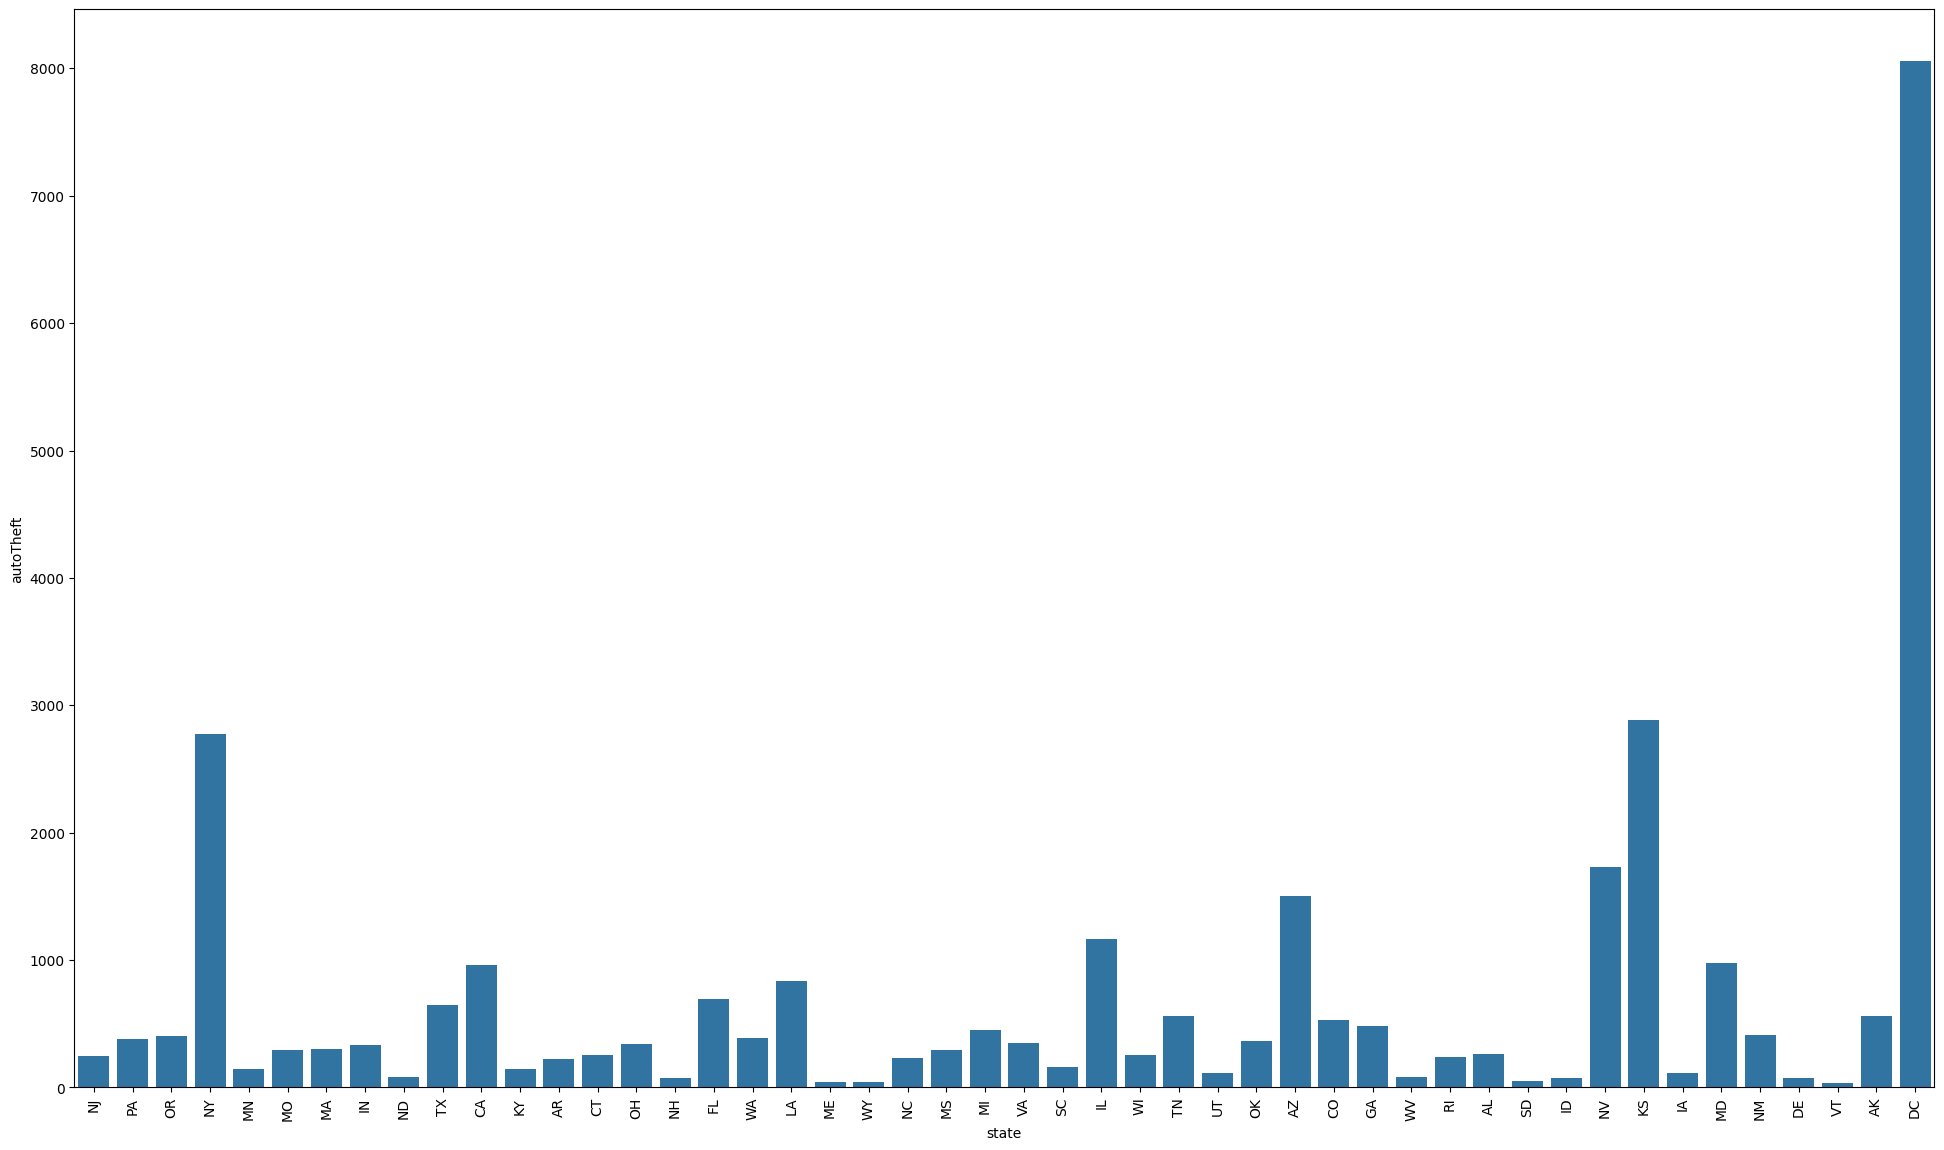

In [14]:
plot_barplot(dataframe=crime_df, x="state", y="autoTheft", xtick_rotation=90, figsize=(24, 14))

- DC has highest autotheft in the country. NY and Kansas are second in auto theft. 

### Larcenies vs State

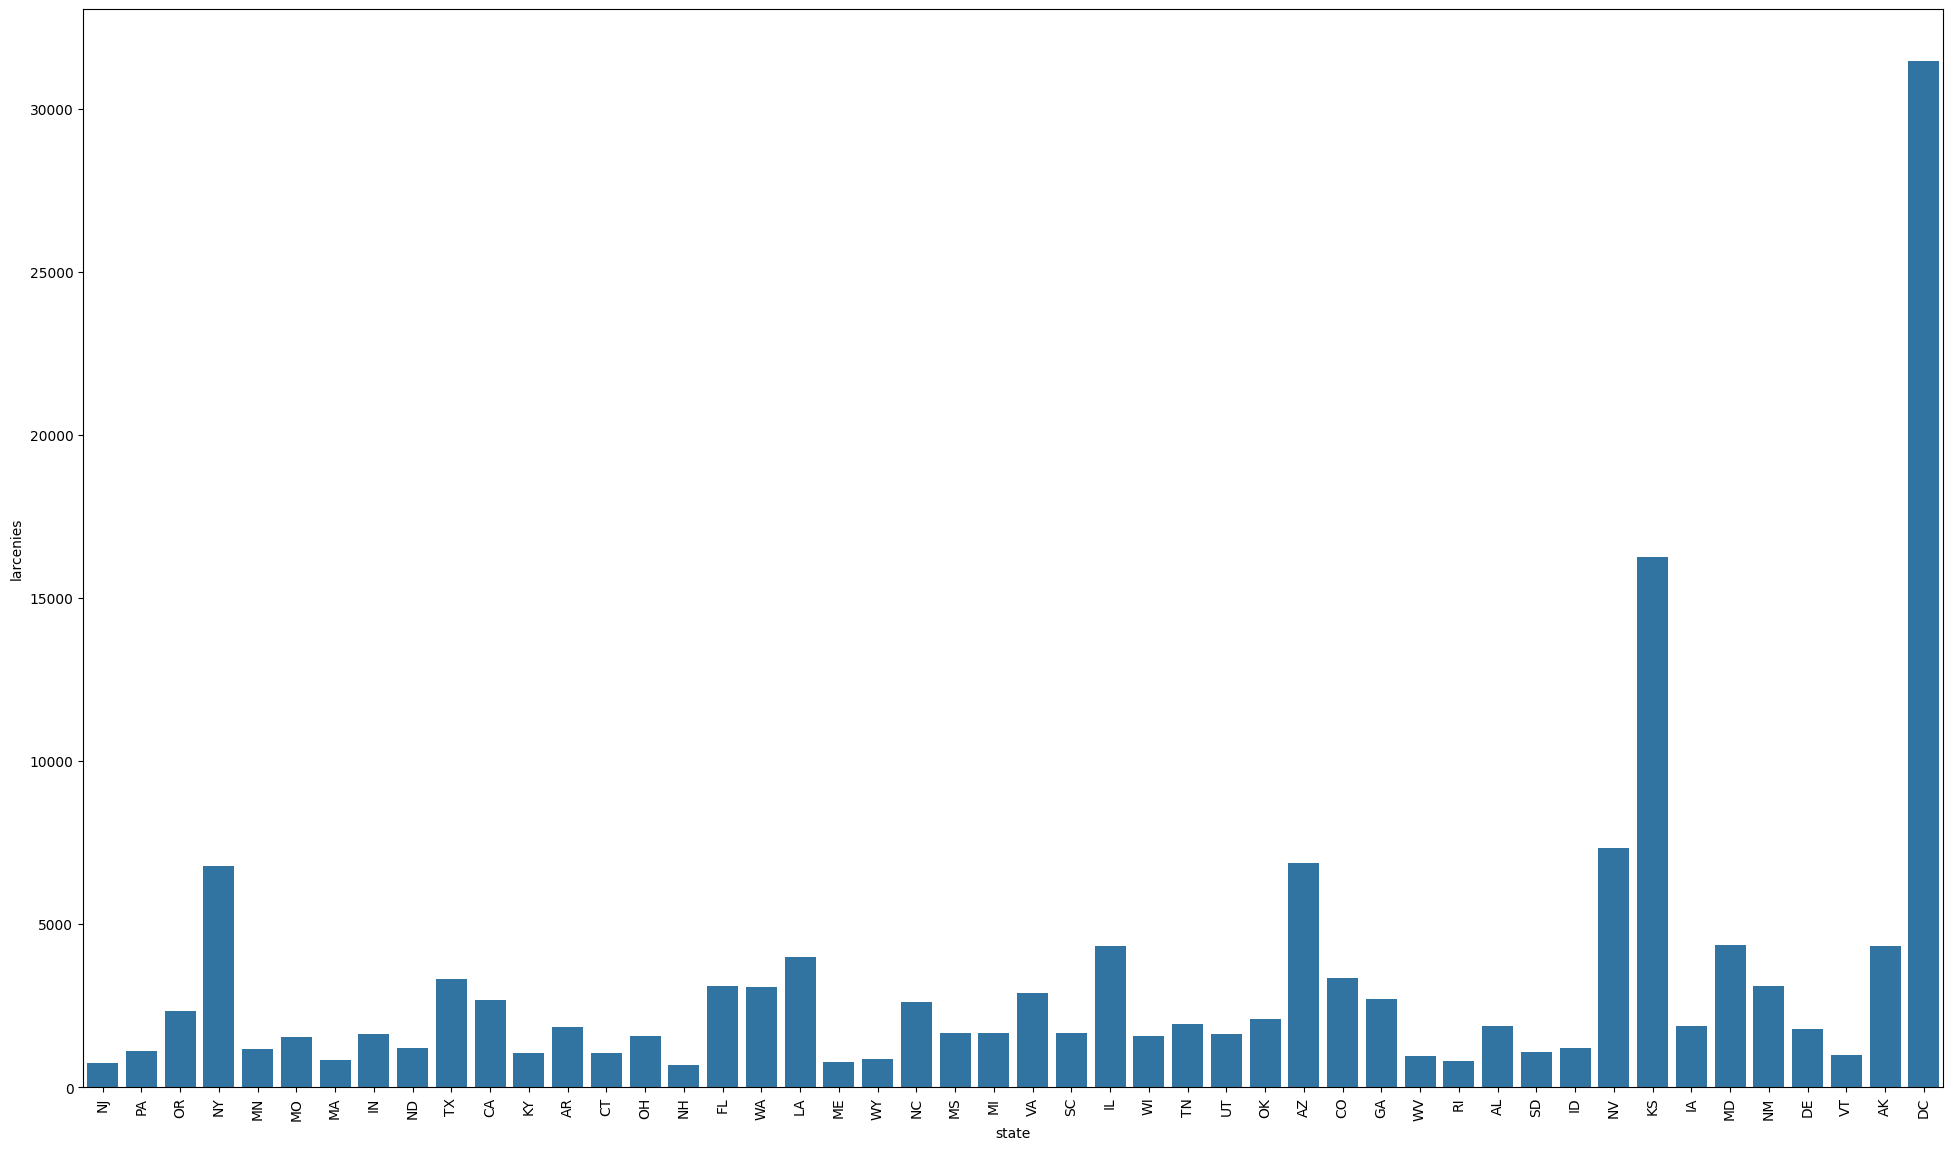

In [15]:
plot_barplot(dataframe=crime_df, x="state", y="larcenies", xtick_rotation=90, figsize=(24, 14))

- DC is also highest by far in larcenies

### Burglaries vs State

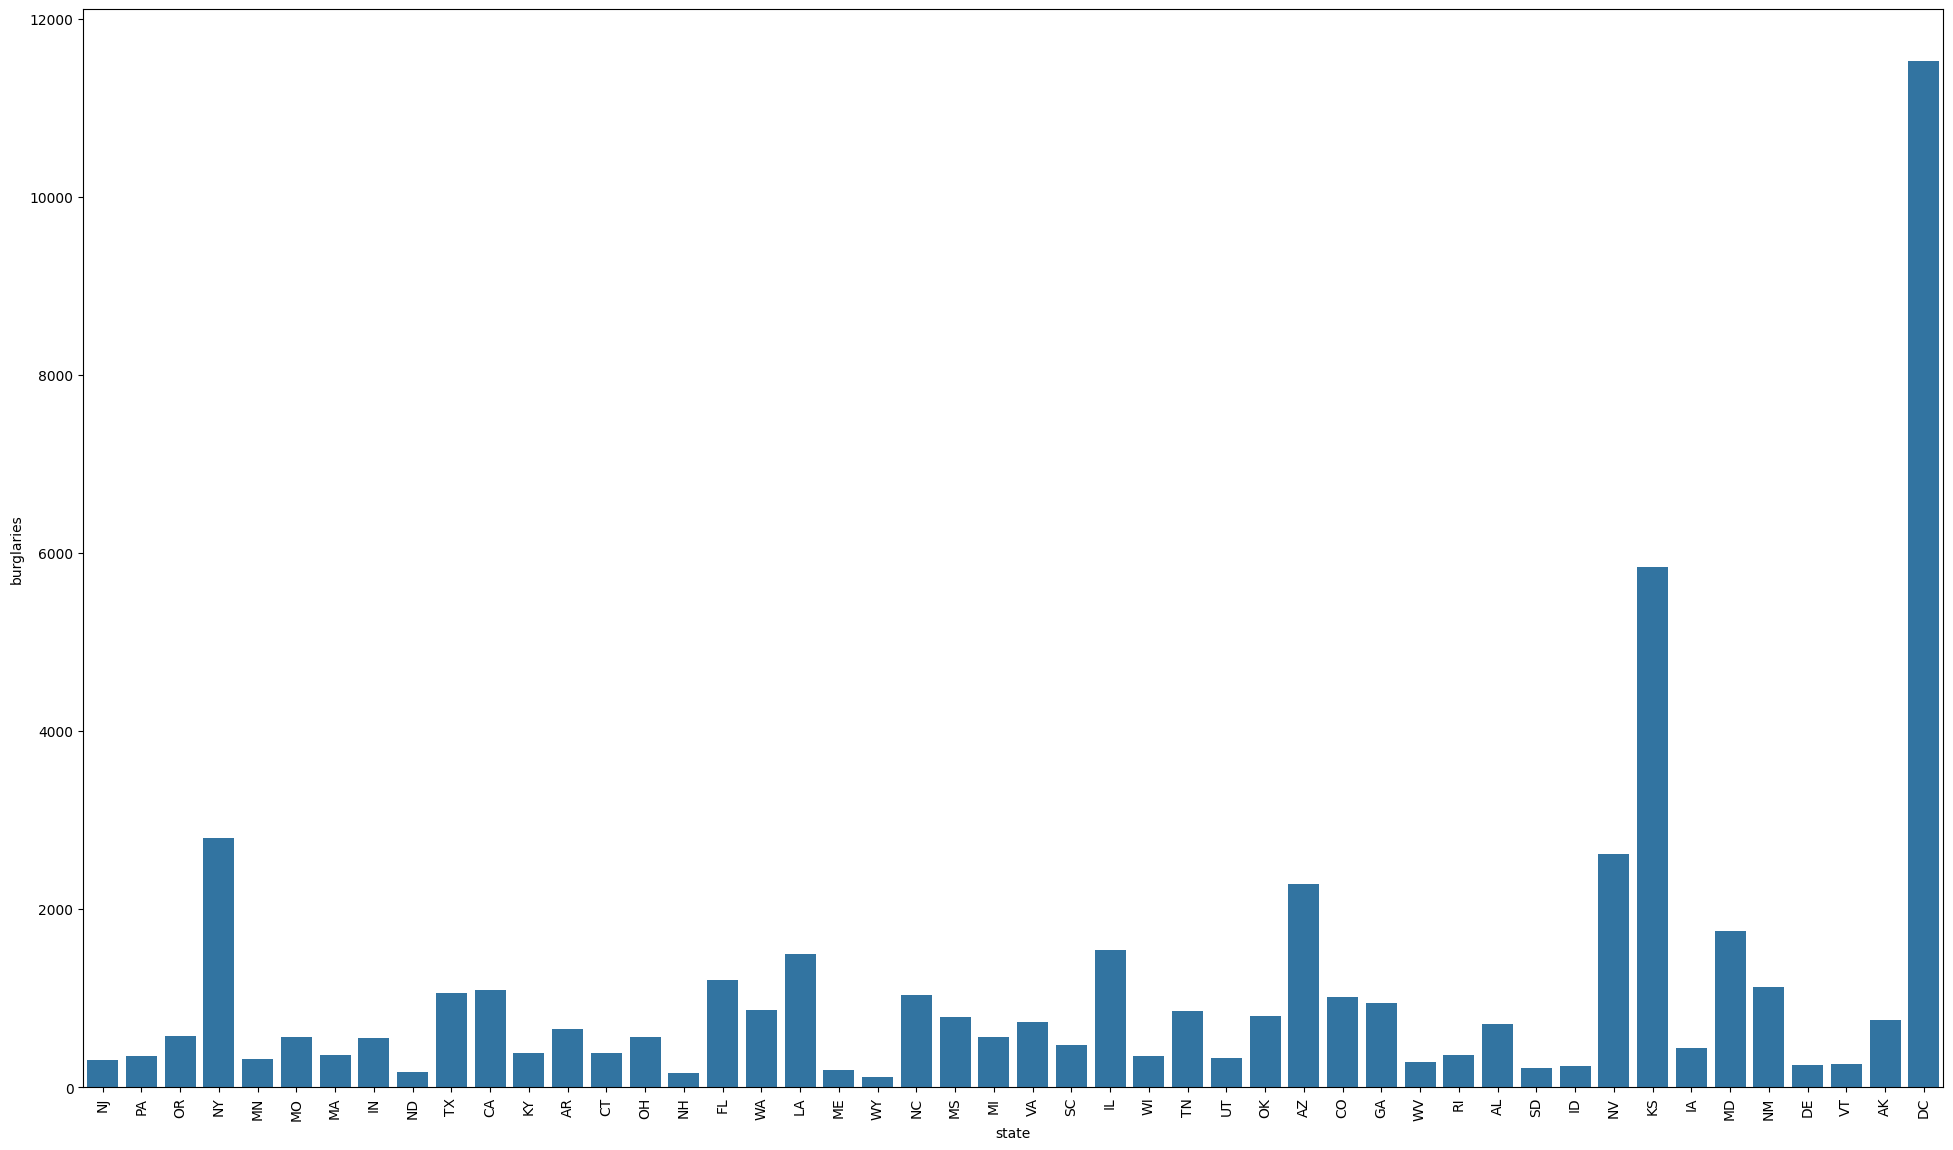

In [16]:
plot_barplot(dataframe=crime_df, x="state", y="burglaries", xtick_rotation=90, figsize=(24, 14))

- DC is also the highest in burglaries

## Population of each State

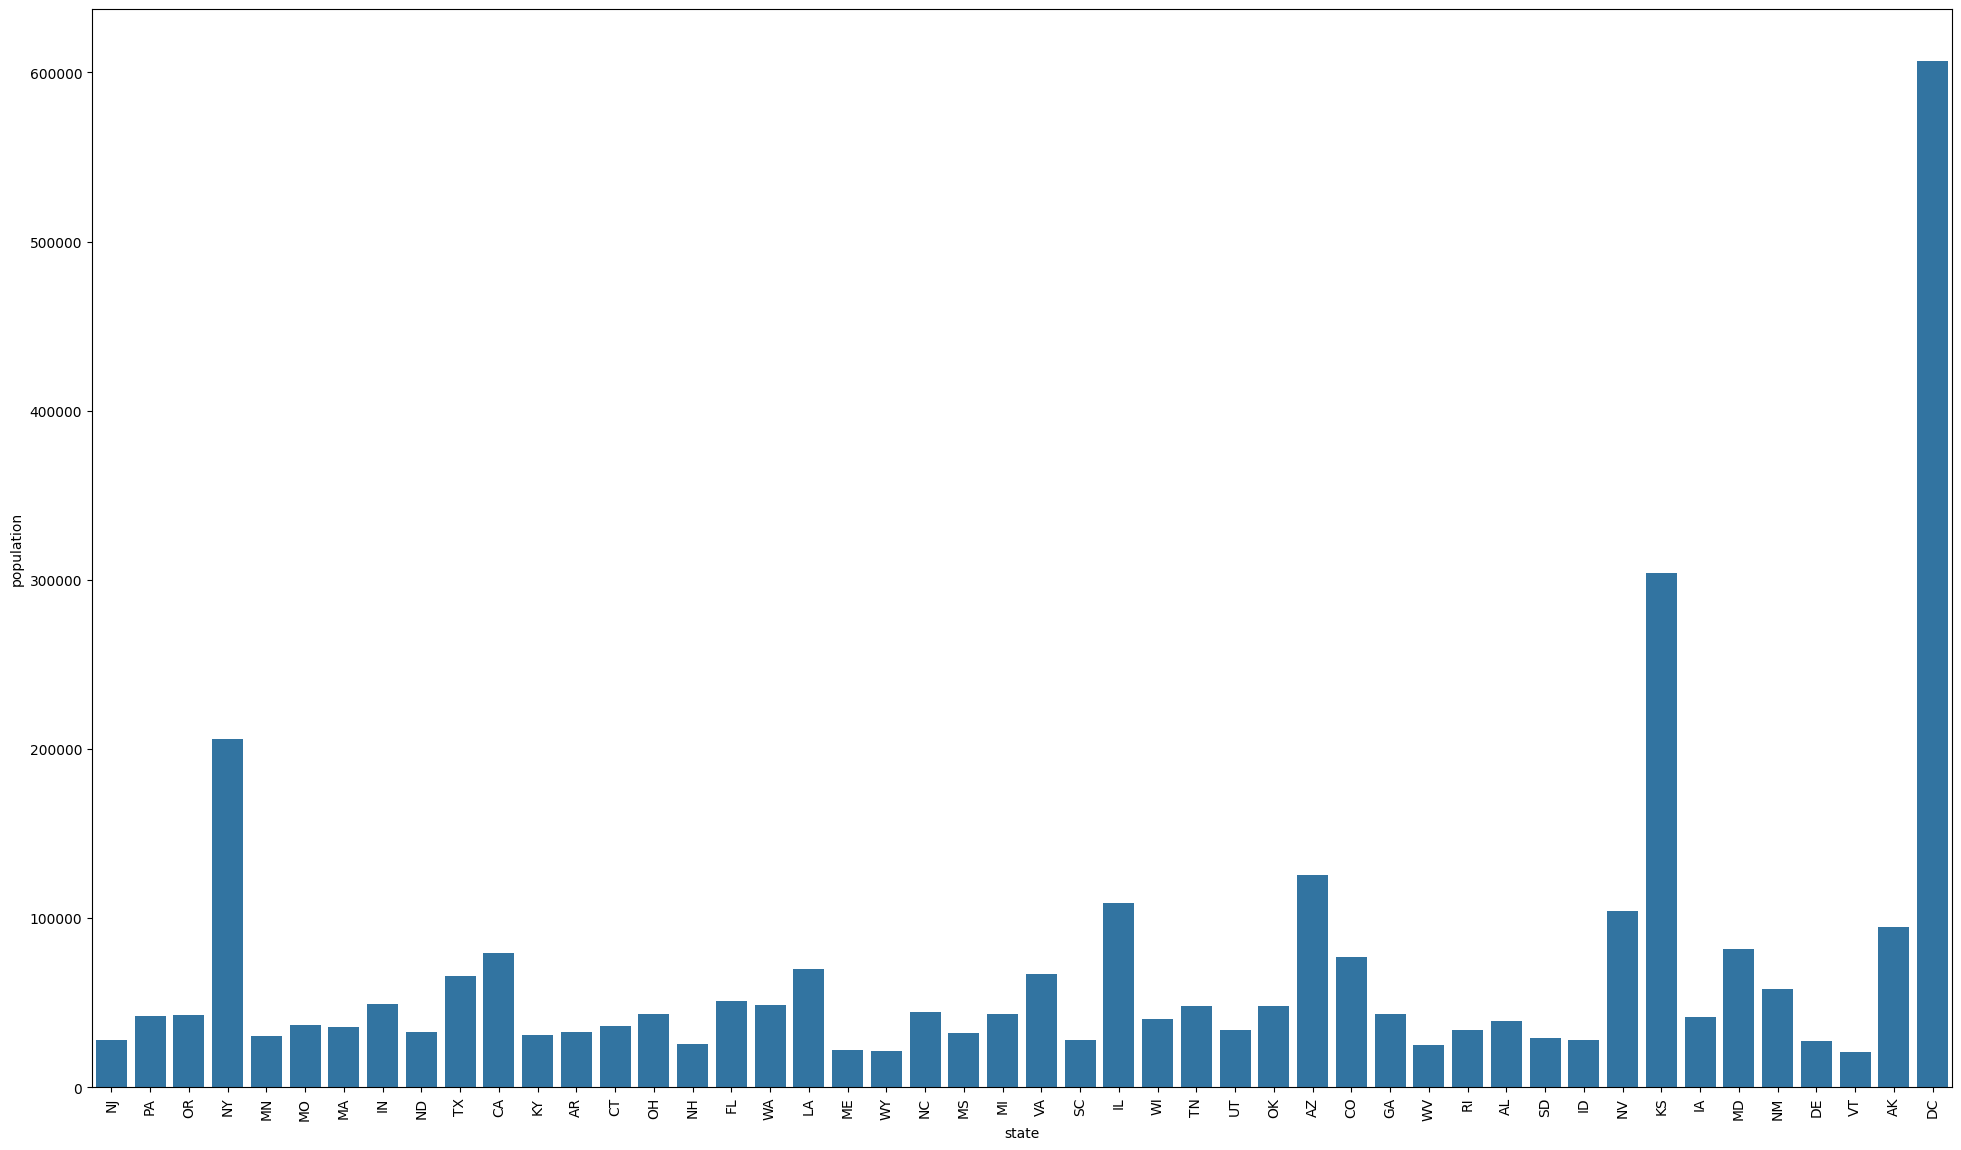

In [17]:
plot_barplot(dataframe=crime_df, x="state", y="population", xtick_rotation=90, figsize=(24, 14))

- And DC is probably the highest in the last 3 crimes because they have the highest population by far
- So, we can say that the more population, the more crime that will take place.

In [18]:
def multiple_barplots(dataframe:pd.DataFrame, x:str|list, y:str|list[str],  title:str=None, n_rows:int=1, n_cols:int=1, figsize:tuple=(9, 4), xtick_rotation:int=0, sharex:bool=True, sharey:bool=True, errorbar:tuple|bool=None)->None:
    fig, ax = plt.subplots(n_rows, n_cols, sharex=sharex, sharey=sharey, figsize=figsize)
    col_index = 0

    if n_rows>1 and n_cols>1:
        for i in range(n_rows):
            for j in range(n_cols):
                ax[i][j] = sns.barplot(data=dataframe, x=x, y=y[col_index], ax=ax[i][j], errorbar=errorbar)
                ax[i][j].tick_params(rotation=xtick_rotation)
                ax[i][j].set_title(f"{y[col_index]} vs {x}")
                ax[i][j].set(ylabel=None, xlabel=None)
                col_index += 1
    elif n_cols > 1:
        for j in range(n_cols):
            ax[j] = sns.barplot(data=dataframe, x=x, y=y[col_index], ax=ax[j], errorbar=errorbar)
            ax[j].tick_params(rotation=xtick_rotation)
            ax[j].set_title(f"{y[col_index]} vs {x}")
            ax[j].set(ylabel=None, xlabel=None)
            col_index += 1
    fig.suptitle(title)
    plt.tight_layout()
    fig.show()

In [19]:
plt.rcParams.update({'font.size': 18})

C:\Users\riain\AppData\Local\Temp\ipykernel_68996\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


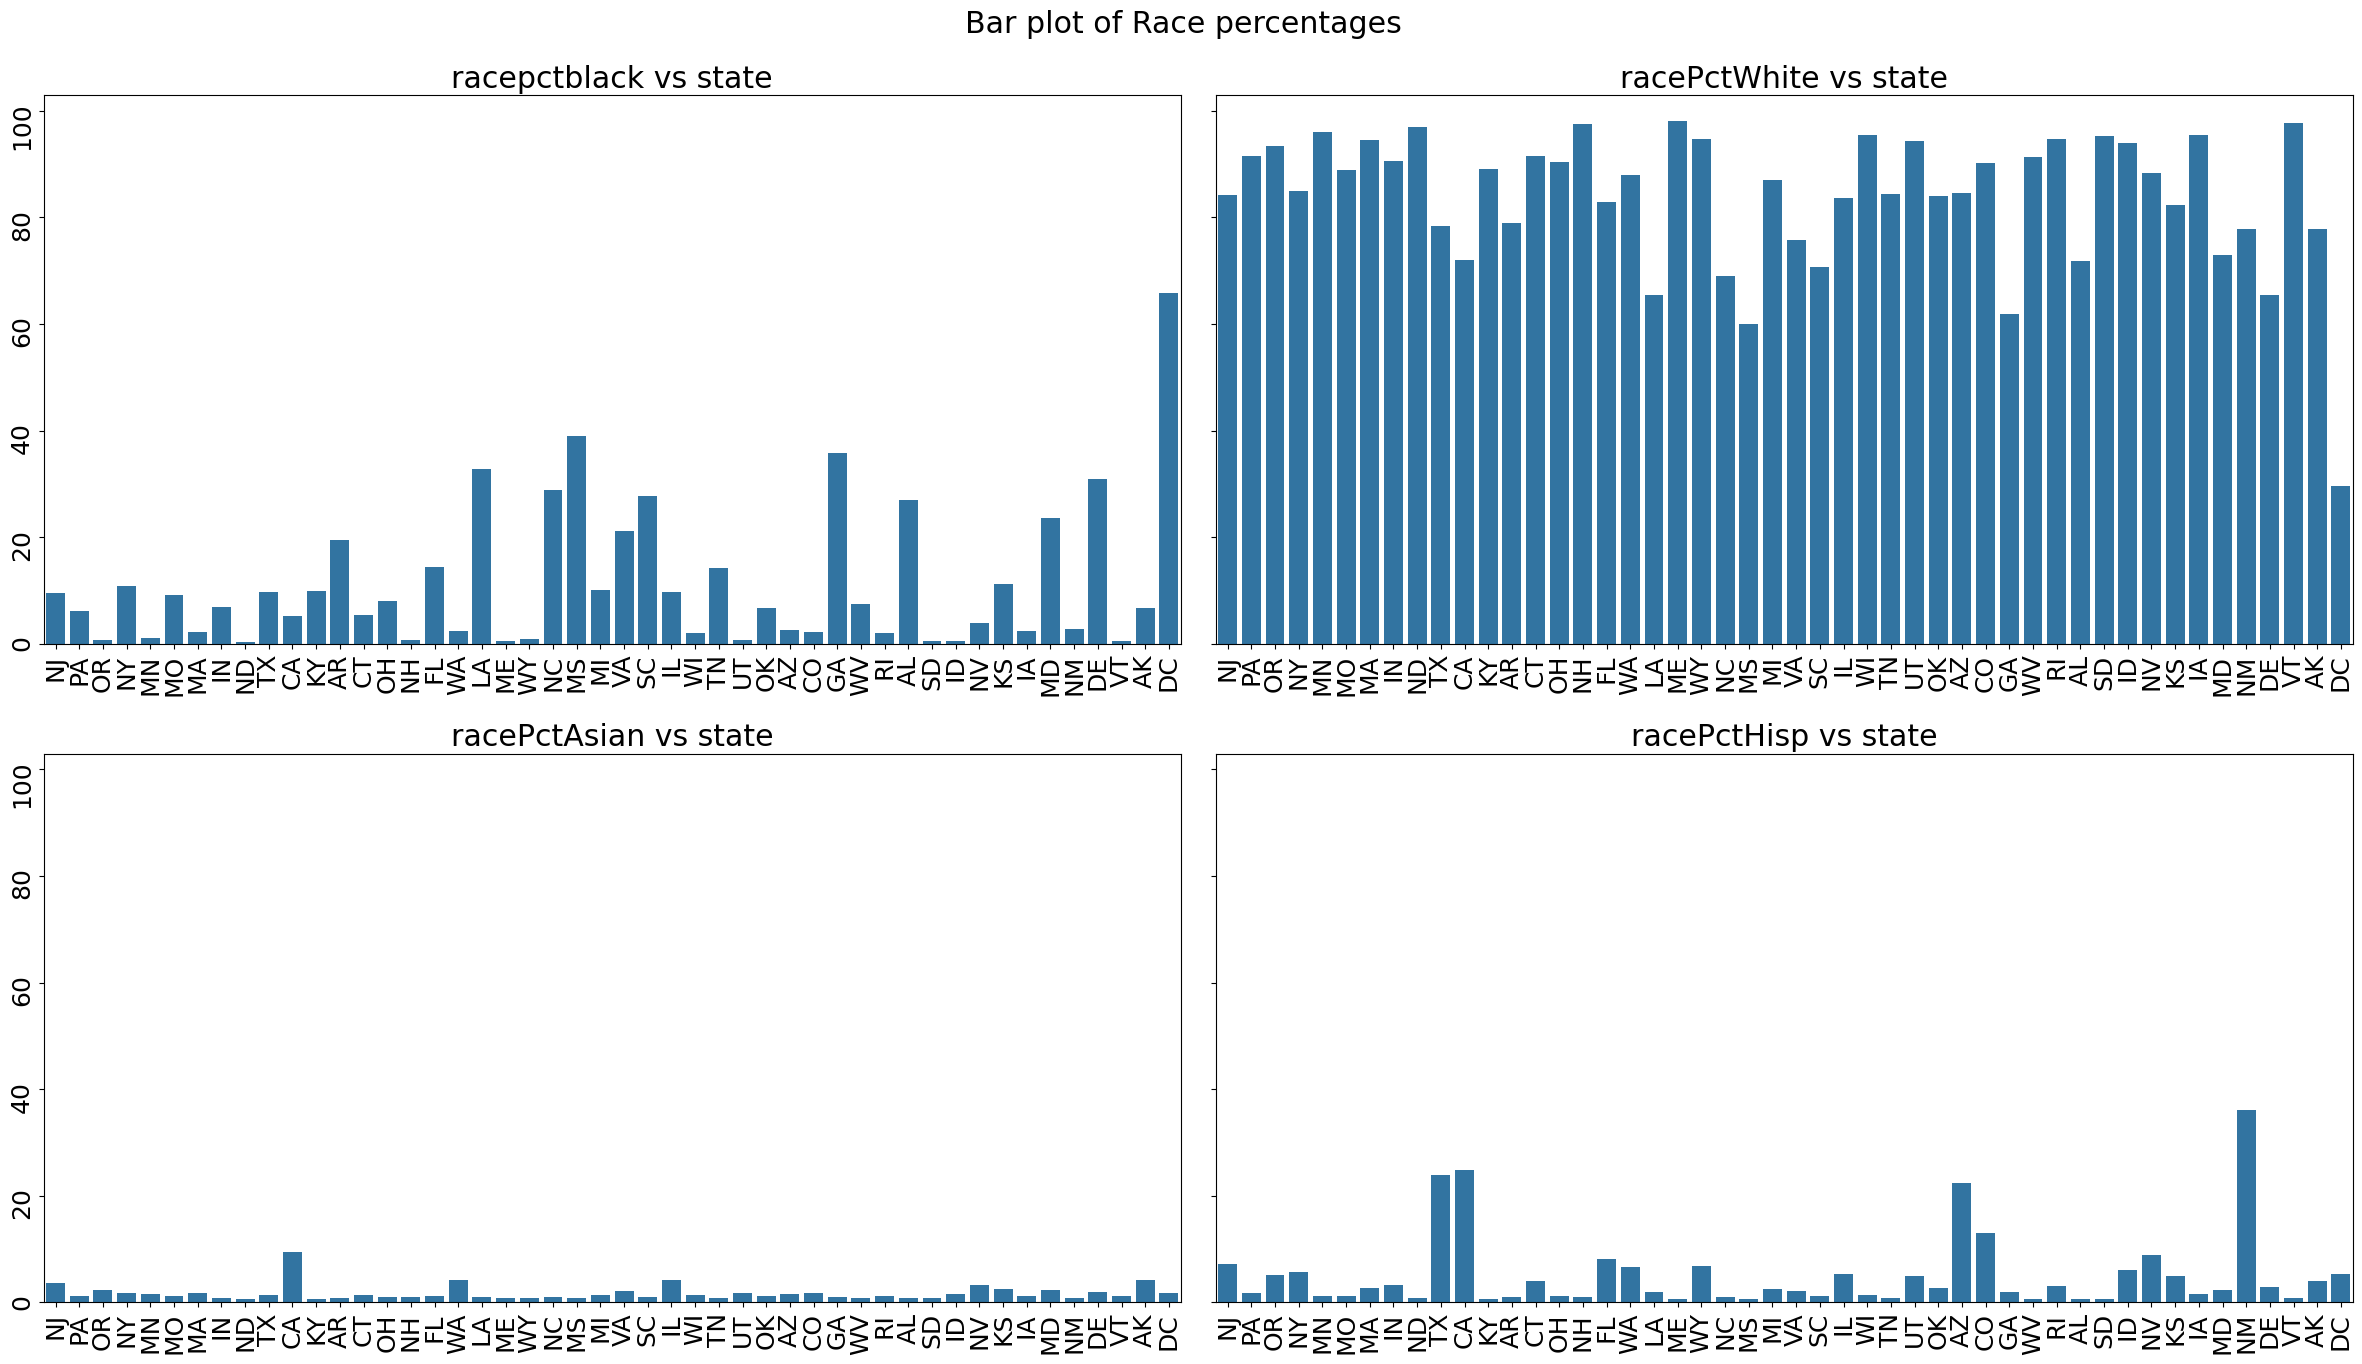

In [20]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["racepctblack", "racePctWhite" , "racePctAsian", "racePctHisp"], 
    title="Bar plot of Race percentages", 
    n_rows=2, n_cols=2, 
    figsize=(24, 14), 
    xtick_rotation=90,
    sharex=False, 
    )

- Most of the race in every state is white, the second highest is black.

In [21]:
all_sum = crime_df[["racepctblack", "racePctWhite", "racePctAsian", "racePctHisp"]].sum().sum()
black_proportion = crime_df["racepctblack"].sum()/all_sum
white_proportion = crime_df["racePctWhite"].sum()/all_sum
hispanic_proportion = crime_df["racePctHisp"].sum()/all_sum
asian_proportion = crime_df["racePctAsian"].sum()/all_sum
print(f"Black proportion: {black_proportion*100}")
print(f"White proportion: {white_proportion*100}")
print(f"Hispanic proportion: {hispanic_proportion*100}")
print(f"Asian proportion: {asian_proportion*100}")

Black proportion: 8.981646812835335
White proportion: 80.80009316440089
Hispanic proportion: 7.649158712168087
Asian proportion: 2.5691013105956824


C:\Users\riain\AppData\Local\Temp\ipykernel_68996\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


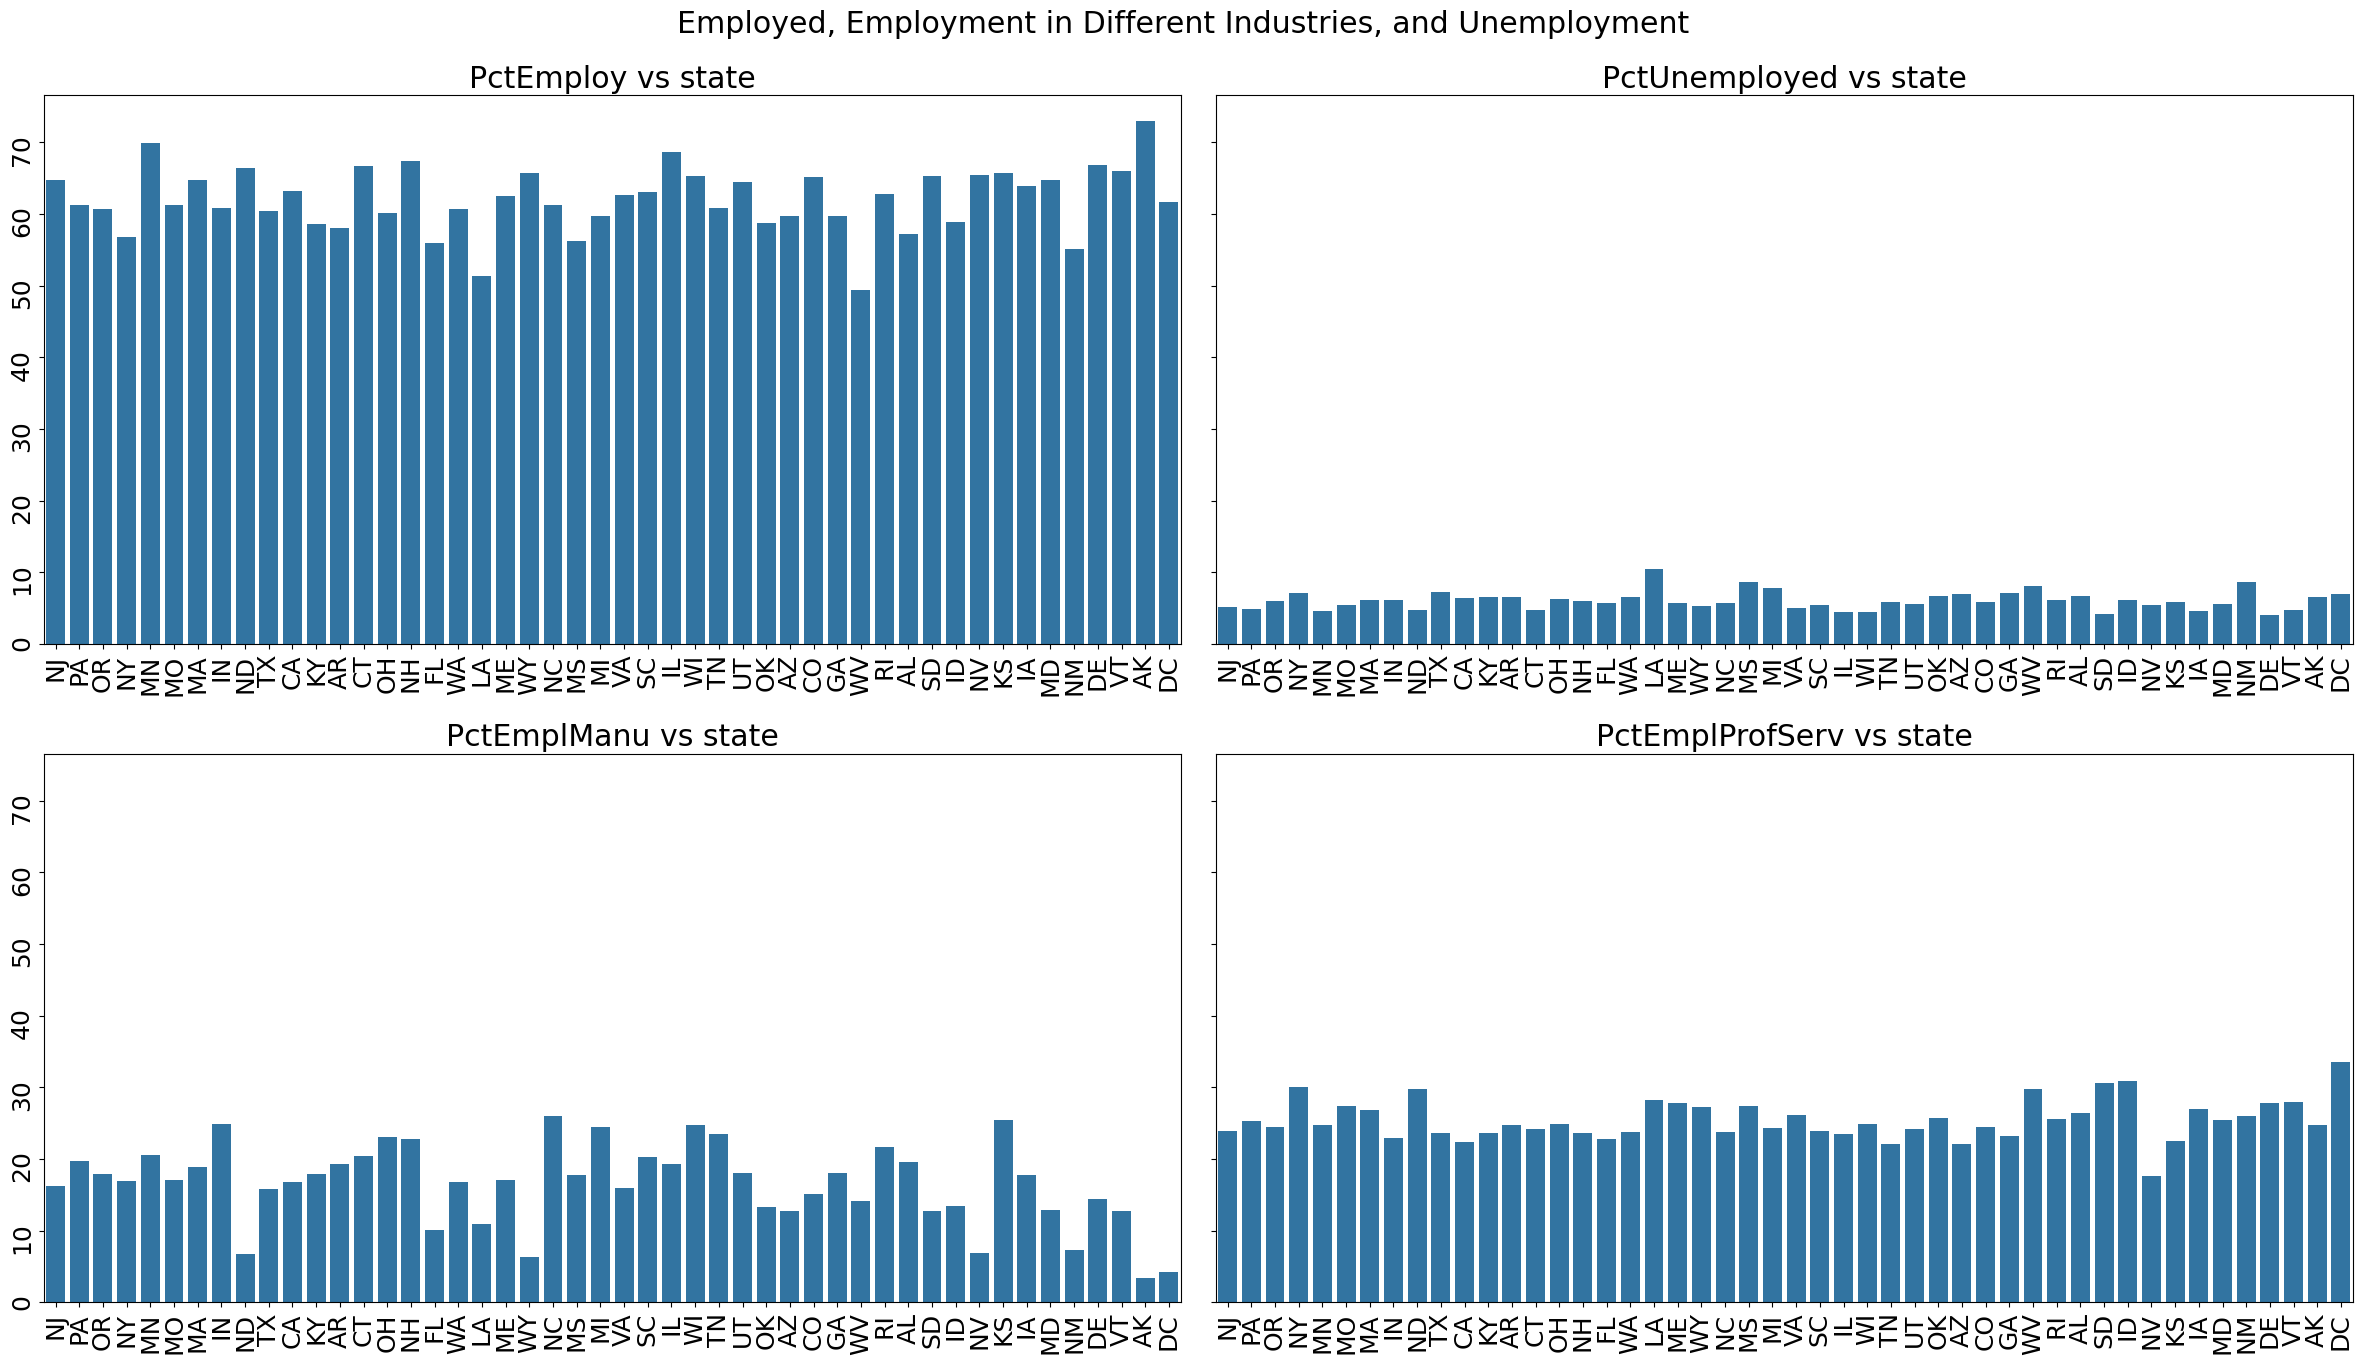

In [22]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["PctEmploy", "PctUnemployed", "PctEmplManu", "PctEmplProfServ"], 
    title="Employed, Employment in Different Industries, and Unemployment", 
    n_rows=2, n_cols=2, 
    figsize=(24, 14), 
    xtick_rotation=90,
    sharex=False, 
    )

* PctUnemployed: Percentage of unemployed individuals (numeric)
* PctEmploy: Percentage of employed individuals (numeric)
* PctEmplManu: Percentage of people employed in manufacturing (numeric)
* PctEmplProfServ: Percentage of people employed in professional services (numeric)

In [23]:
plt.rcParams.update({'font.size': 30})

C:\Users\riain\AppData\Local\Temp\ipykernel_68996\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


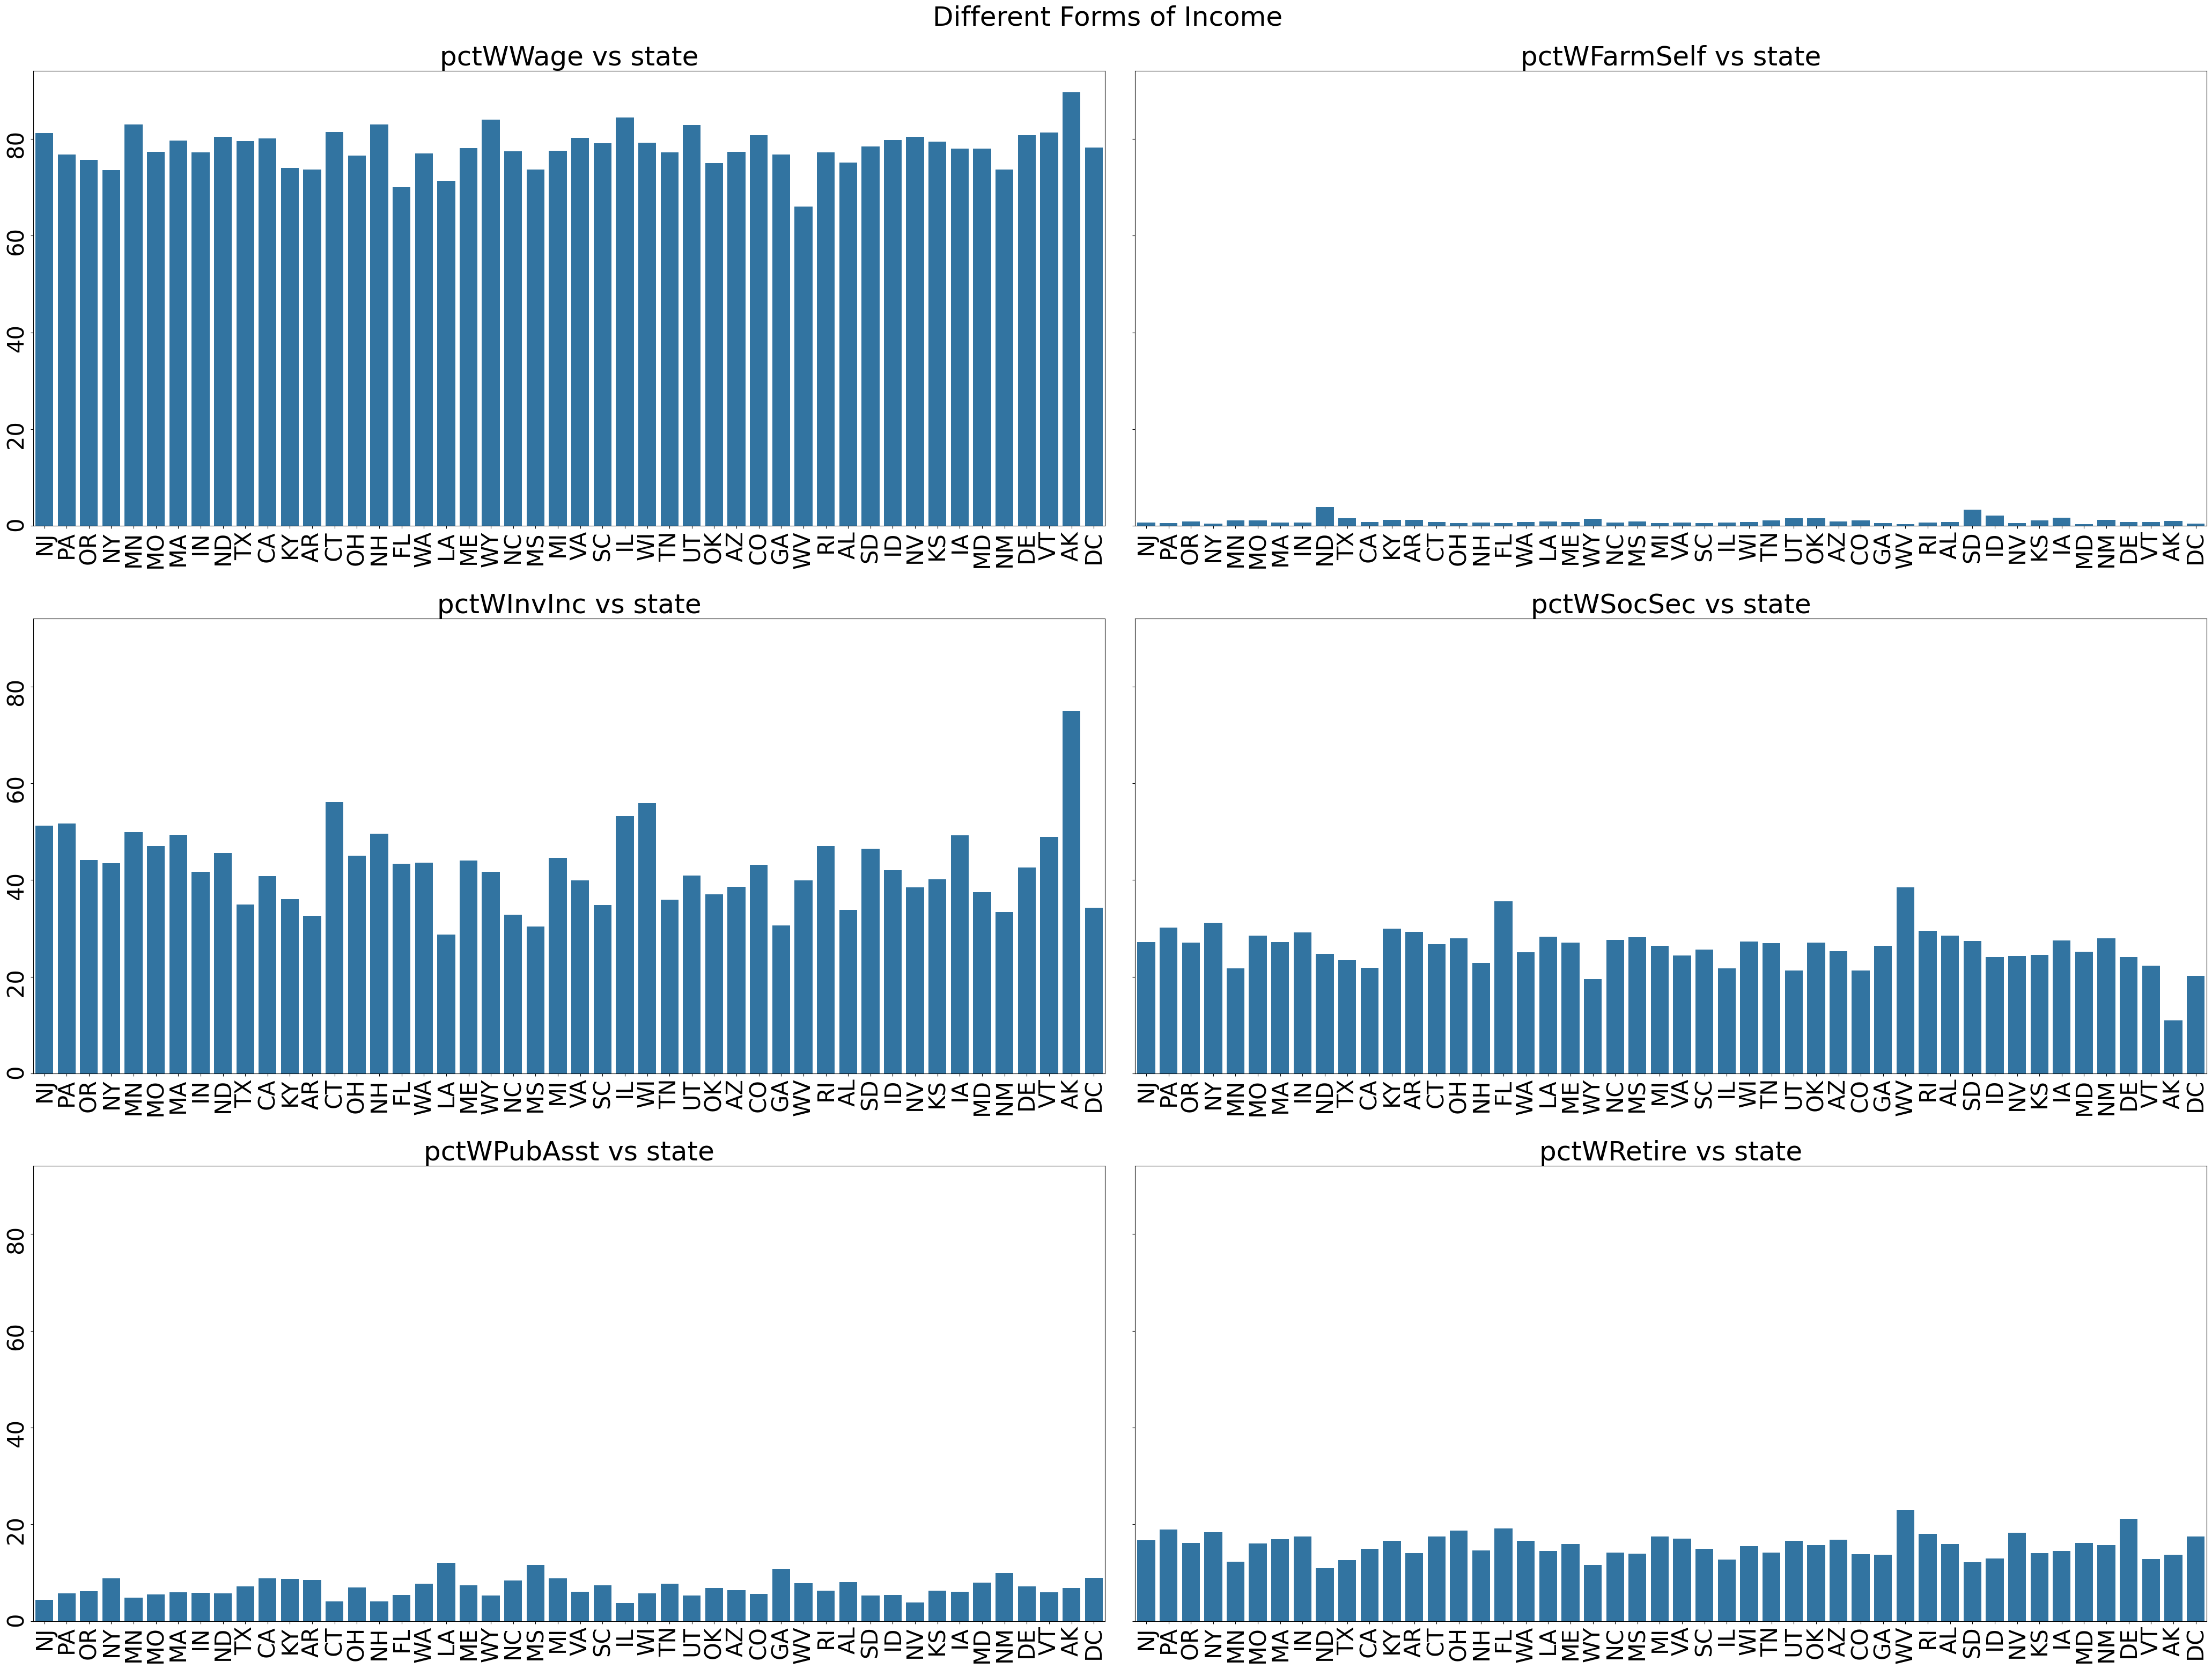

In [24]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire"], 
    title="Different Forms of Income", 
    n_rows=3, n_cols=2, 
    figsize=(42, 32), 
    xtick_rotation=90,
    sharex=False, 
    )

* pctWWage: Percentage of households with wage/salary income in 1989 (numeric)
* pctWFarmSelf: Percentage of households with farm or self-employment income in 1989 (numeric)
* pctWInvInc: Percentage of households with investment income (numeric)
* pctWSocSec: Percentage of households with social security income (numeric)
* pctWPubAsst: Percentage of households with public assistance (numeric)
* pctWRetire: Percentage of households with retirement income (numeric)

C:\Users\riain\AppData\Local\Temp\ipykernel_68996\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


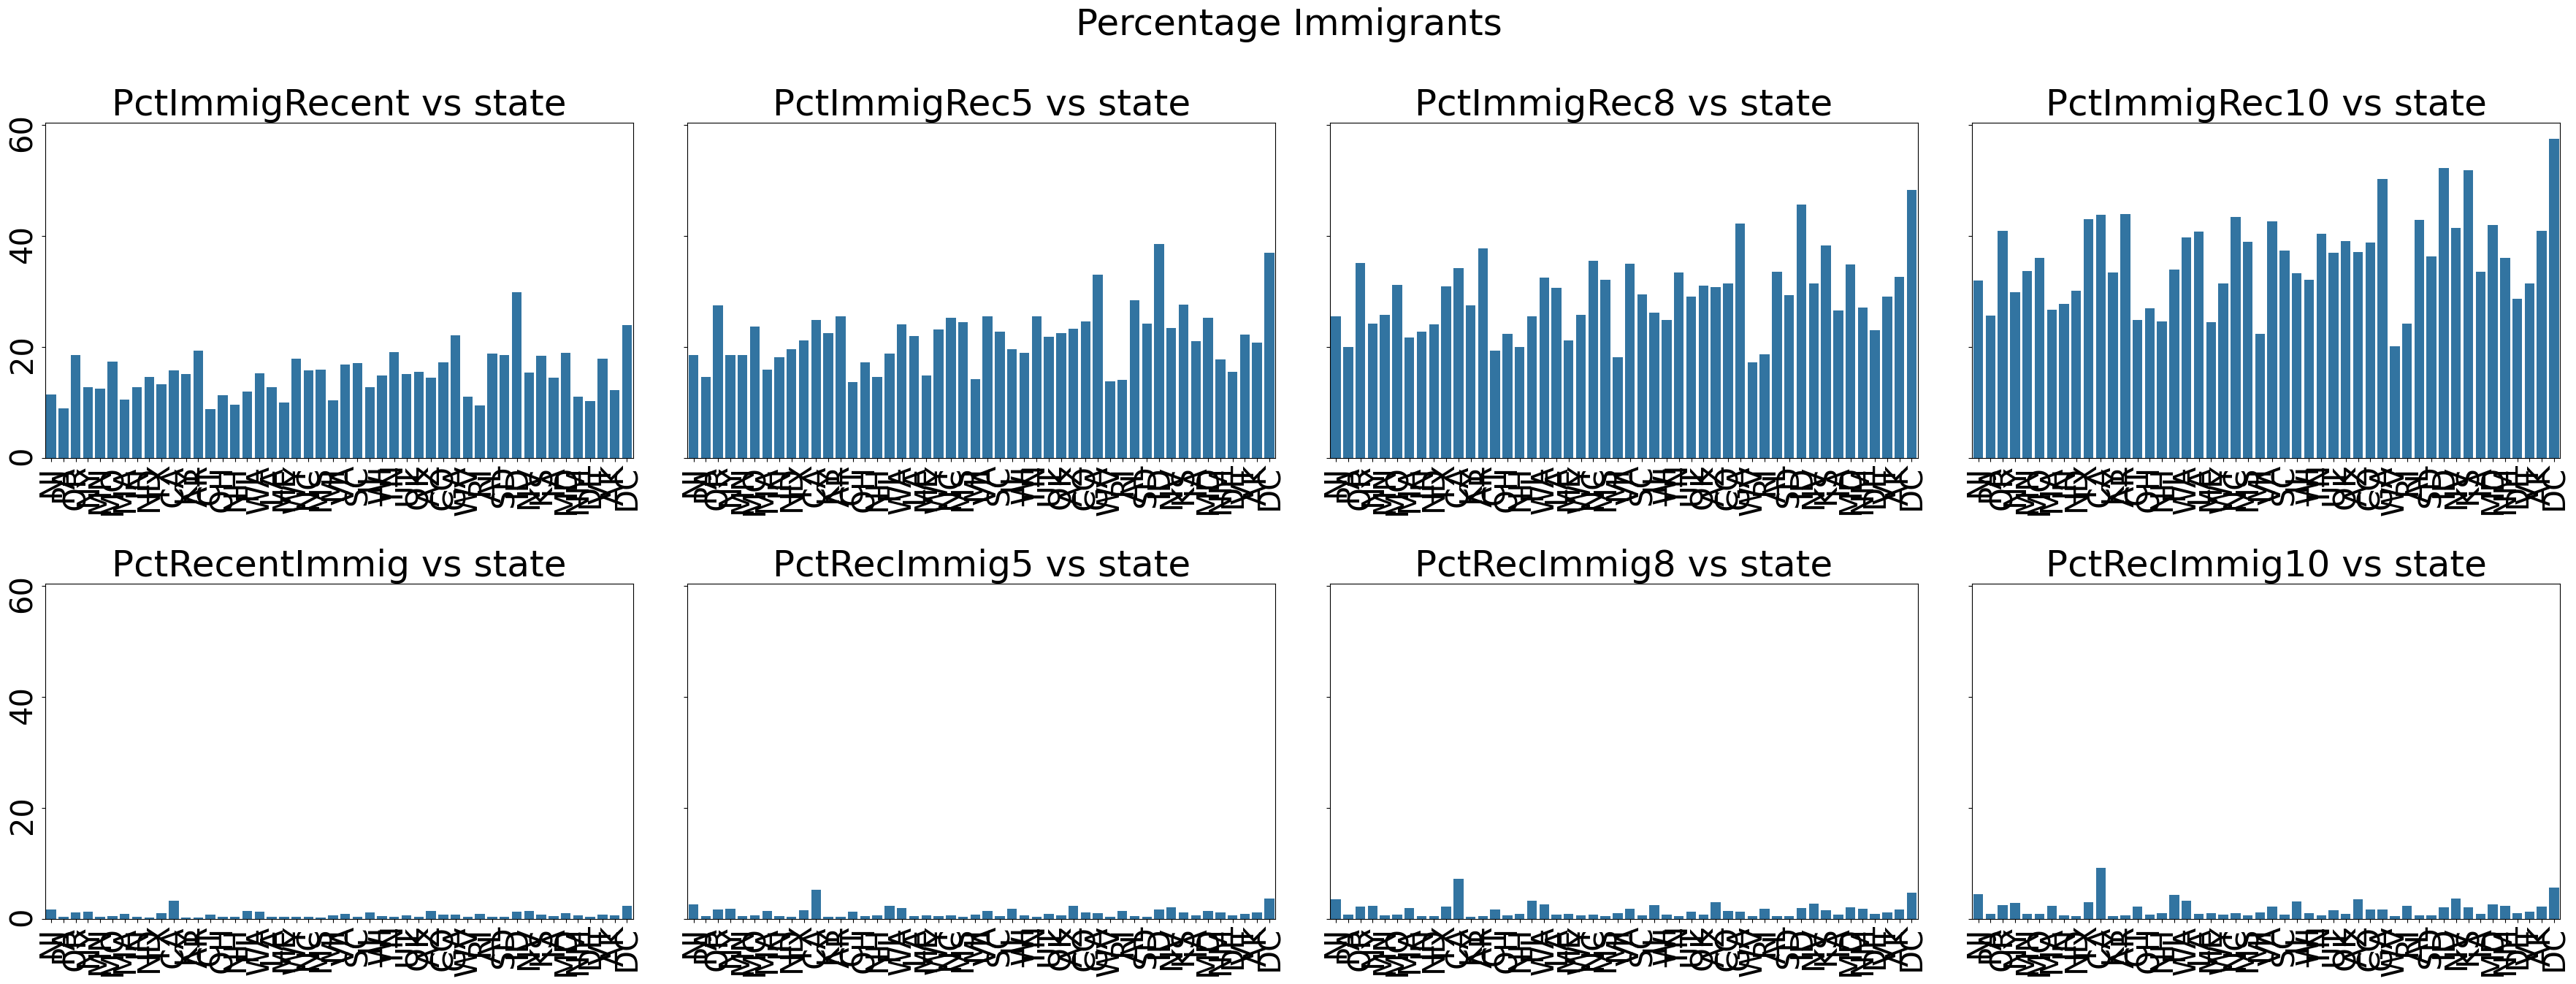

In [25]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10"], 
    title="Percentage Immigrants", 
    n_rows=2, n_cols=4, 
    figsize=(36, 14), 
    xtick_rotation=90,
    sharex=False, 
    )

* PctImmigRecent: Percentage of recent immigrants (within 3 years) (numeric)
* PctImmigRec5: Percentage of immigrants within the last 5 years (numeric)
* PctImmigRec8: Percentage of immigrants within the last 8 years (numeric)
* PctImmigRec10: Percentage of immigrants within the last 10 years (numeric)
* PctRecentImmig: Percentage of recent immigrants in the population (numeric)
* PctRecImmig5: Percentage of population who immigrated within the last 5 years (numeric)
* PctRecImmig8: Percentage of population who immigrated within the last 8 years (numeric)
* PctRecImmig10: Percentage of population who immigrated within the last 10 years (numeric)

C:\Users\riain\AppData\Local\Temp\ipykernel_68996\314118356.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


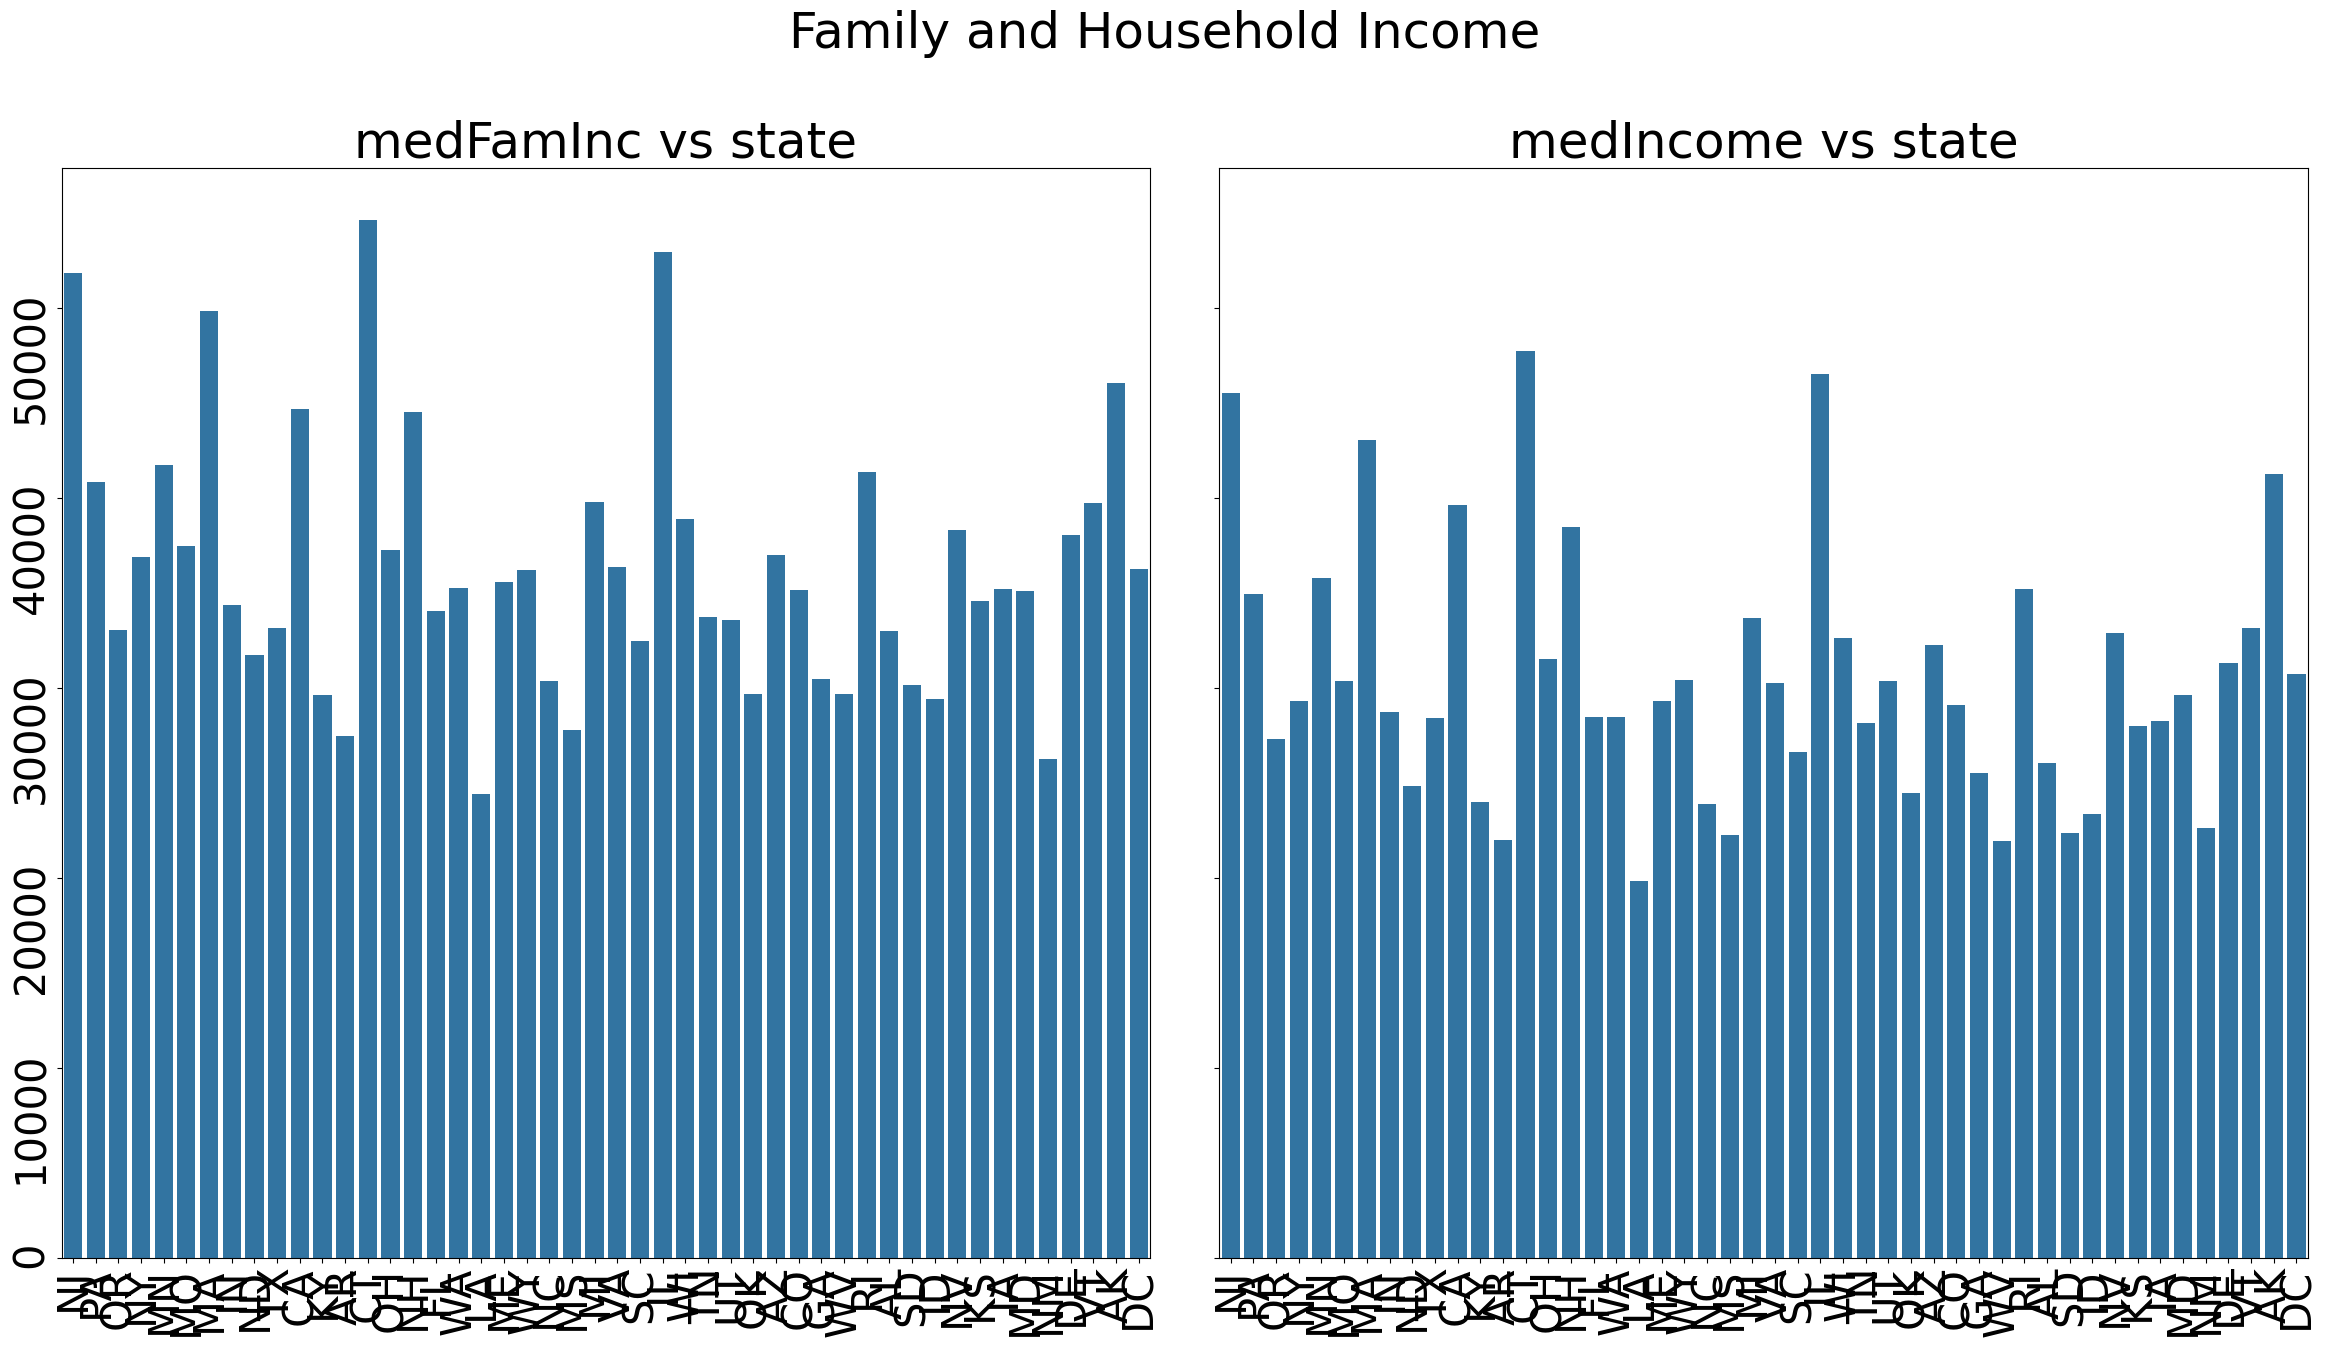

In [26]:
multiple_barplots(
    dataframe=crime_df, 
    x="state", 
    y=["medFamInc", "medIncome"], 
    title="Family and Household Income", 
    n_rows=1, n_cols=2, 
    figsize=(24, 14), 
    xtick_rotation=90,
    sharex=False, 
    )

* medIncome: Median household income (numeric)
* medFamInc: Median family income (numeric)

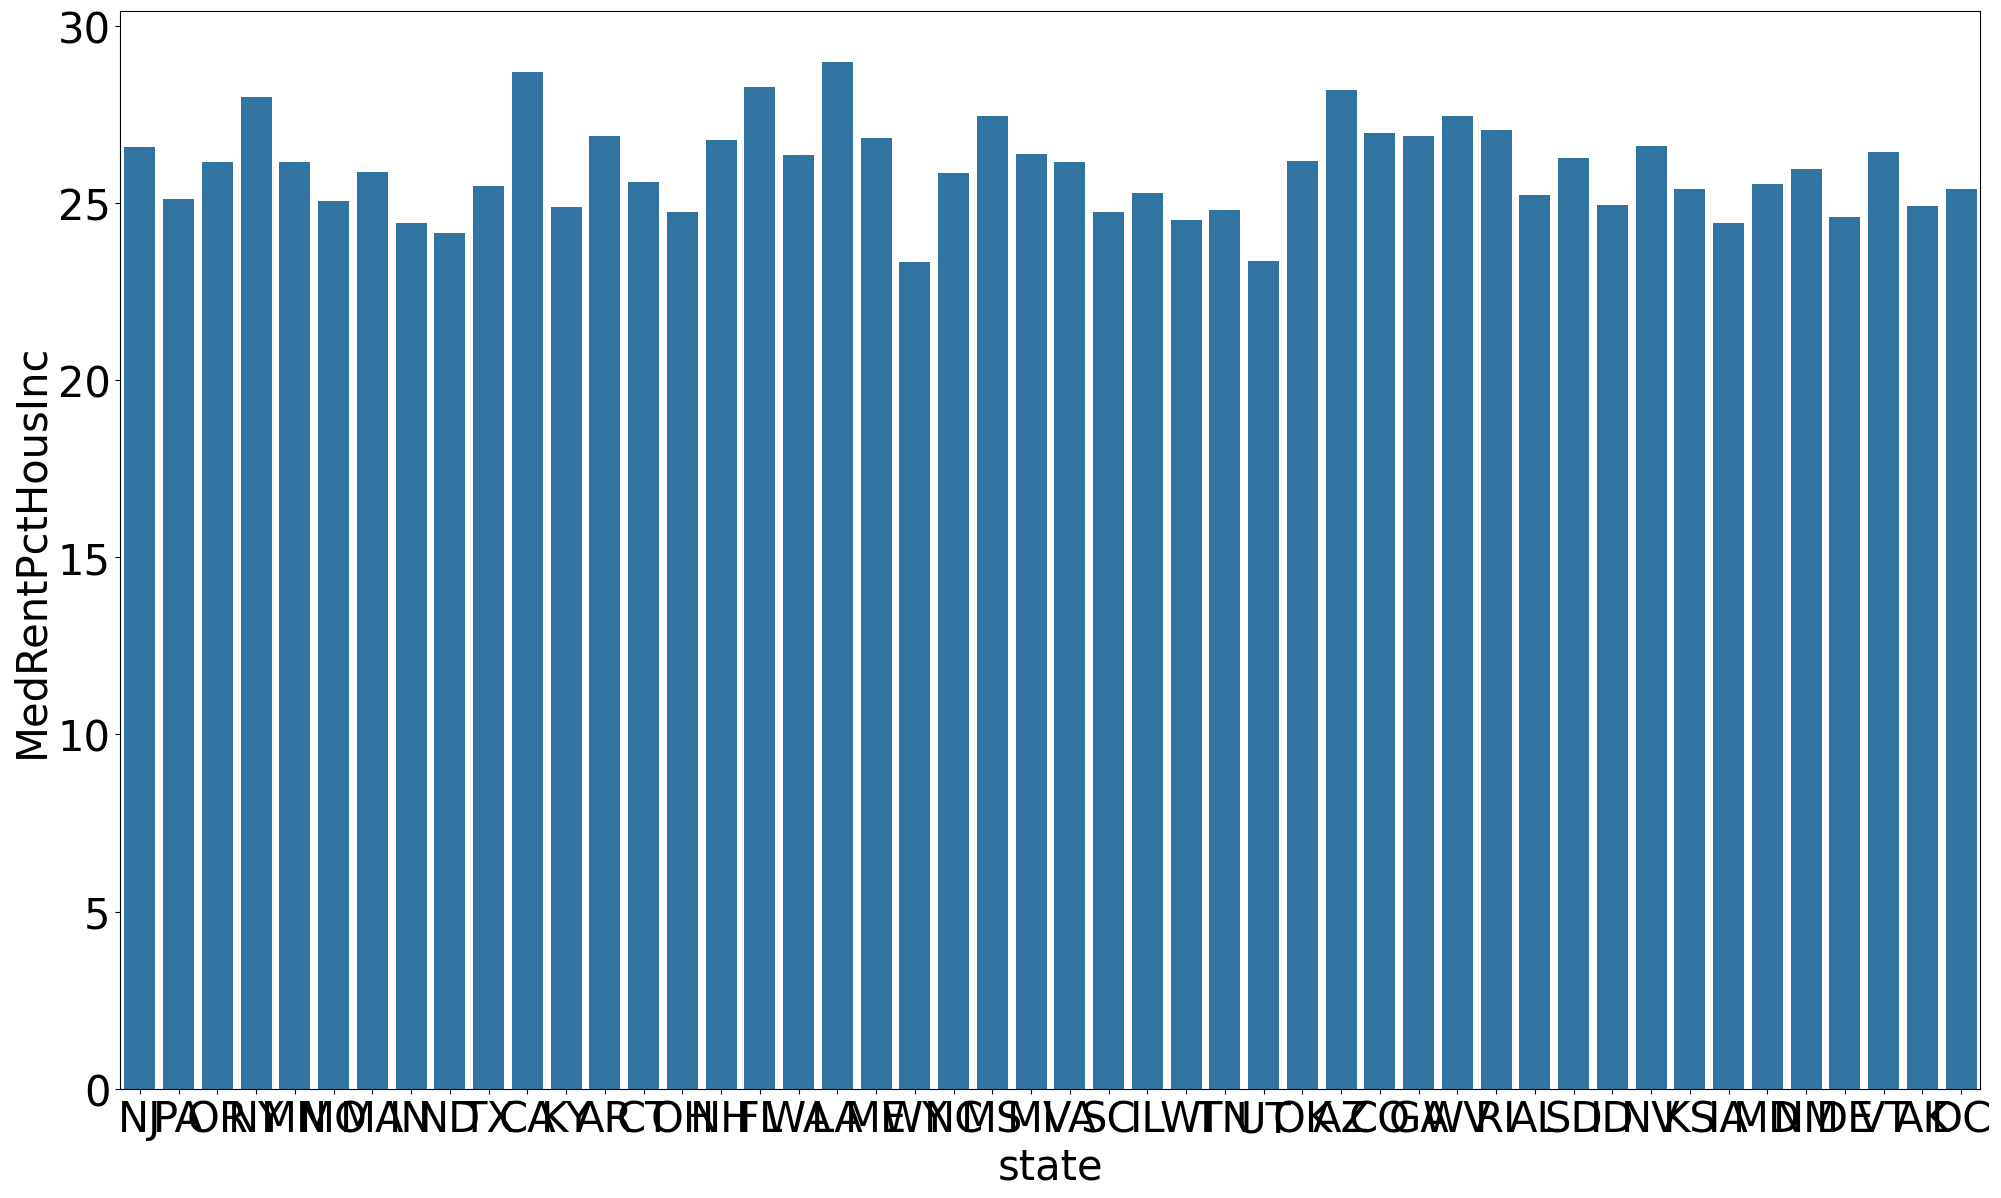

In [27]:
plot_barplot(
    dataframe=crime_df,
    x="state",
    y="MedRentPctHousInc",
    figsize=(24, 14)
)

## Outliers
---

In [28]:
def outlierChecker(data: pd.DataFrame, column: str):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    upper_outliers = data[data[column] > data[column].quantile(0.75) + 1.5 * iqr]
    lower_outliers = data[data[column] < data[column].quantile(0.25) - 1.5 * iqr]
    return upper_outliers, lower_outliers

def outlierSummary(data: pd.DataFrame, column: str):
    upper, lower = outlierChecker(data, column)
    print(f"Column: {column}")
    print(f"Upper Outliers: {len(upper)}")
    print(f"Lower Outliers: {len(lower)}")
    print(f"Normalized Upper Outliers: {len(upper)/data.shape[0]}")
    print(f"Normalized Lower Outliers: {len(lower)/data.shape[0]}")
    print("-----------------------------------")

def outlierSummary2(data: pd.DataFrame, column: str):
    upper, lower = outlierChecker(data, column)
    print(f"Column: {column} has {len(upper)+len(lower)} outliers")

def outlierSummary3(data: pd.DataFrame, column: str):
    upper, lower = outlierChecker(data, column)
    total = len(upper) + len(lower)
    return pd.DataFrame({f"{column}":[total]})

In [29]:
for col in crime_df.select_dtypes(include=["number"]).columns.tolist():
    outlierSummary2(data=crime_df, column=col)

Column: fold has 0 outliers
Column: population has 219 outliers
Column: householdsize has 93 outliers
Column: racepctblack has 252 outliers
Column: racePctWhite has 88 outliers
Column: racePctAsian has 240 outliers
Column: racePctHisp has 268 outliers
Column: agePct12t21 has 153 outliers
Column: agePct12t29 has 151 outliers
Column: agePct16t24 has 206 outliers
Column: agePct65up has 38 outliers
Column: numbUrban has 165 outliers
Column: pctUrban has 0 outliers
Column: medIncome has 43 outliers
Column: pctWWage has 25 outliers
Column: pctWFarmSelf has 117 outliers
Column: pctWInvInc has 2 outliers
Column: pctWSocSec has 19 outliers
Column: pctWPubAsst has 76 outliers
Column: pctWRetire has 34 outliers
Column: medFamInc has 63 outliers
Column: perCapInc has 111 outliers
Column: whitePerCap has 119 outliers
Column: blackPerCap has 72 outliers
Column: indianPerCap has 133 outliers
Column: AsianPerCap has 116 outliers
Column: OtherPerCap has 121 outliers
Column: HispPerCap has 85 outliers
C

4. If we calculate the outliers with IQR method, then we see outliers in almost every column to take note of.

In [30]:
features_of_interest = ["medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", 
                        "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", 
                        "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", 
                        "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg"]

In [31]:
outlier_df = pd.DataFrame()
for col in features_of_interest:
    outlier_df = pd.concat([outlier_df, outlierSummary3(data=crime_df, column=col)], axis=1)

outlier_df = outlier_df.T
outlier_df = outlier_df.reset_index()
outlier_df.columns = ["Columns", "Outliers"]
outlier_df

Columns  Outliers
0               medIncome        43
1                pctWWage        25
2            pctWFarmSelf       117
3              pctWInvInc         2
4              pctWSocSec        19
5             pctWPubAsst        76
6              pctWRetire        34
7               medFamInc        63
8               perCapInc       111
9             whitePerCap       119
10            blackPerCap        72
11           indianPerCap       133
12            AsianPerCap       116
13            OtherPerCap       121
14             HispPerCap        85
15      MedRentPctHousInc        62
16       MedOwnCostPctInc         4
17  MedOwnCostPctIncNoMtg        64

In [32]:
plt.rcParams.update({'font.size': 18})

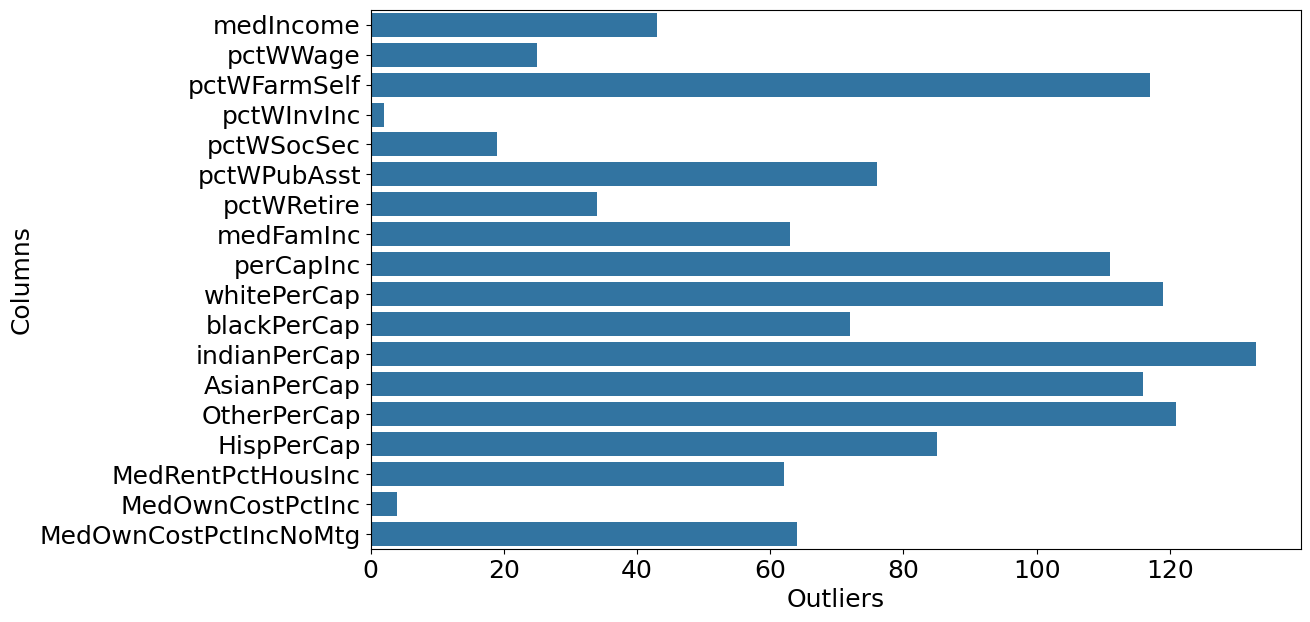

In [33]:
plot_barplot(
    dataframe=outlier_df,
    y="Columns",
    x="Outliers",
)

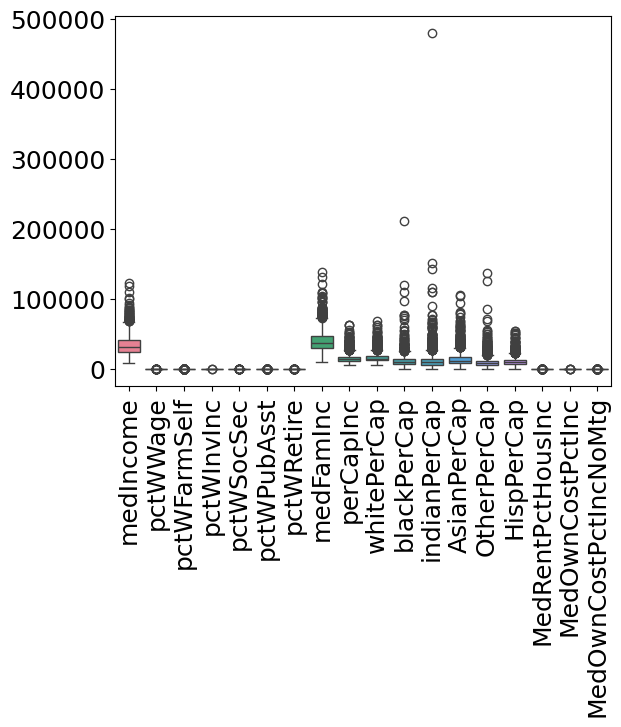

In [34]:
sns.boxplot(
    data=crime_df[features_of_interest]
)

plt.xticks(rotation=90)
plt.show()

## Correlation
---

In [35]:
plt.rcParams.update({"font.size":12})

In [36]:
corr = crime_df[features_of_interest + ["autoTheft", "autoTheftPerPop"]].corr()
corr_auto = corr[["autoTheft", "autoTheftPerPop"]]

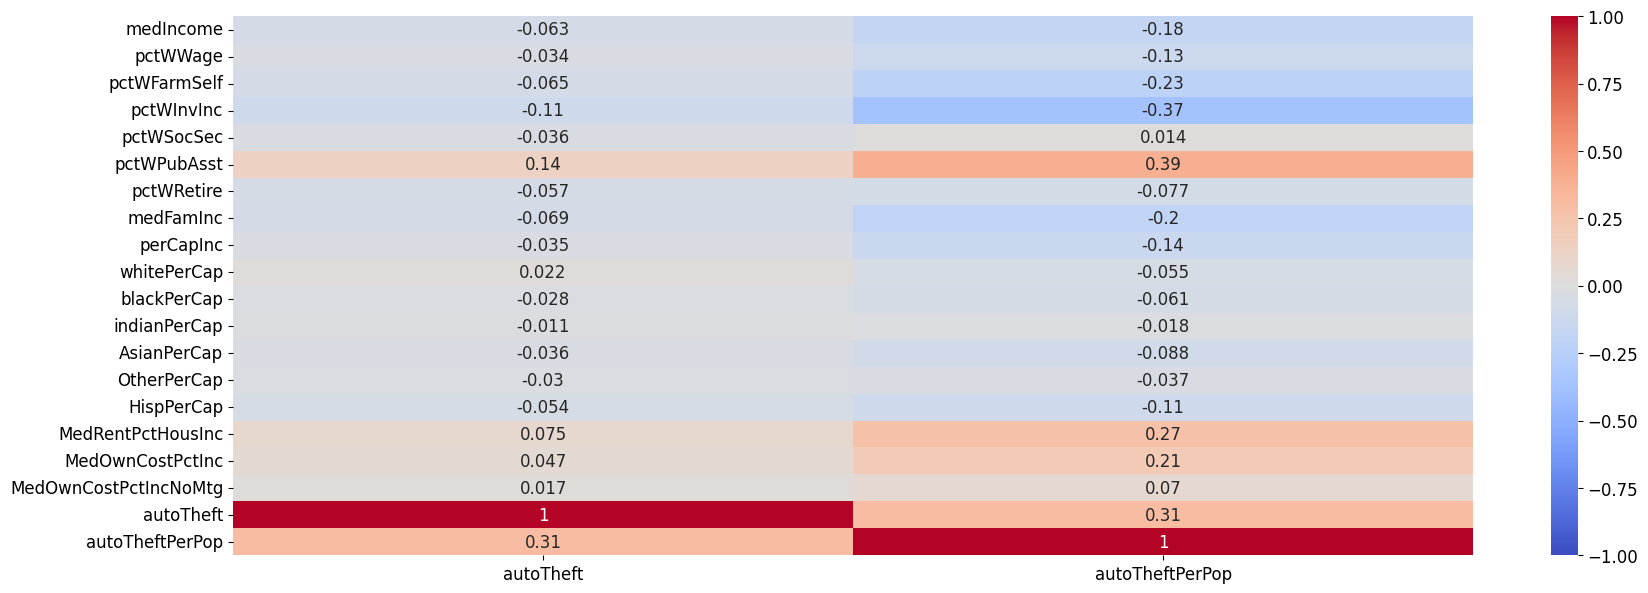

In [37]:
plt.figure(figsize=(20, 7))
sns.heatmap(corr_auto, vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

## Graph Correlation with Scatterplot
---

In [38]:
def linear_relationship_plot(dataframe: pd.DataFrame, x:str, y:list, title:str, ci:bool=False, n_rows:int=1, n_cols:int=1, sharex=True, sharey=True, xtick_rotation:int=0, figsize:tuple=(28, 14)) :
    fig, ax = plt.subplots(n_rows, n_cols, sharex=sharex, sharey=sharey, figsize=figsize)
    col_index = 0

    if n_rows>1 and n_cols>1:
        for i in range(n_rows):
            for j in range(n_cols):
                ax[i][j] = sns.regplot(data=dataframe, x=x, y=y[col_index], ax=ax[i][j], ci=ci, line_kws={"color":"red"})
                ax[i][j].tick_params(rotation=xtick_rotation)
                ax[i][j].set_title(f"{y[col_index]} vs {x}")
                ax[i][j].set(ylabel=None, xlabel=None)
                col_index += 1
    elif n_cols > 1:
        for j in range(n_cols):
            ax[j] = sns.regplot(data=dataframe, x=x, y=y[col_index], ax=ax[j], ci=ci, line_kws={"color":"red"})
            ax[j].tick_params(rotation=xtick_rotation)
            ax[j].set_title(f"{y[col_index]} vs {x}")
            ax[j].set(ylabel=None, xlabel=None)
            col_index += 1
    fig.suptitle(title)
    plt.tight_layout()
    fig.show()

In [39]:
plt.rcParams.update({"font.size":21})

C:\Users\riain\AppData\Local\Temp\ipykernel_68996\1068752479.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


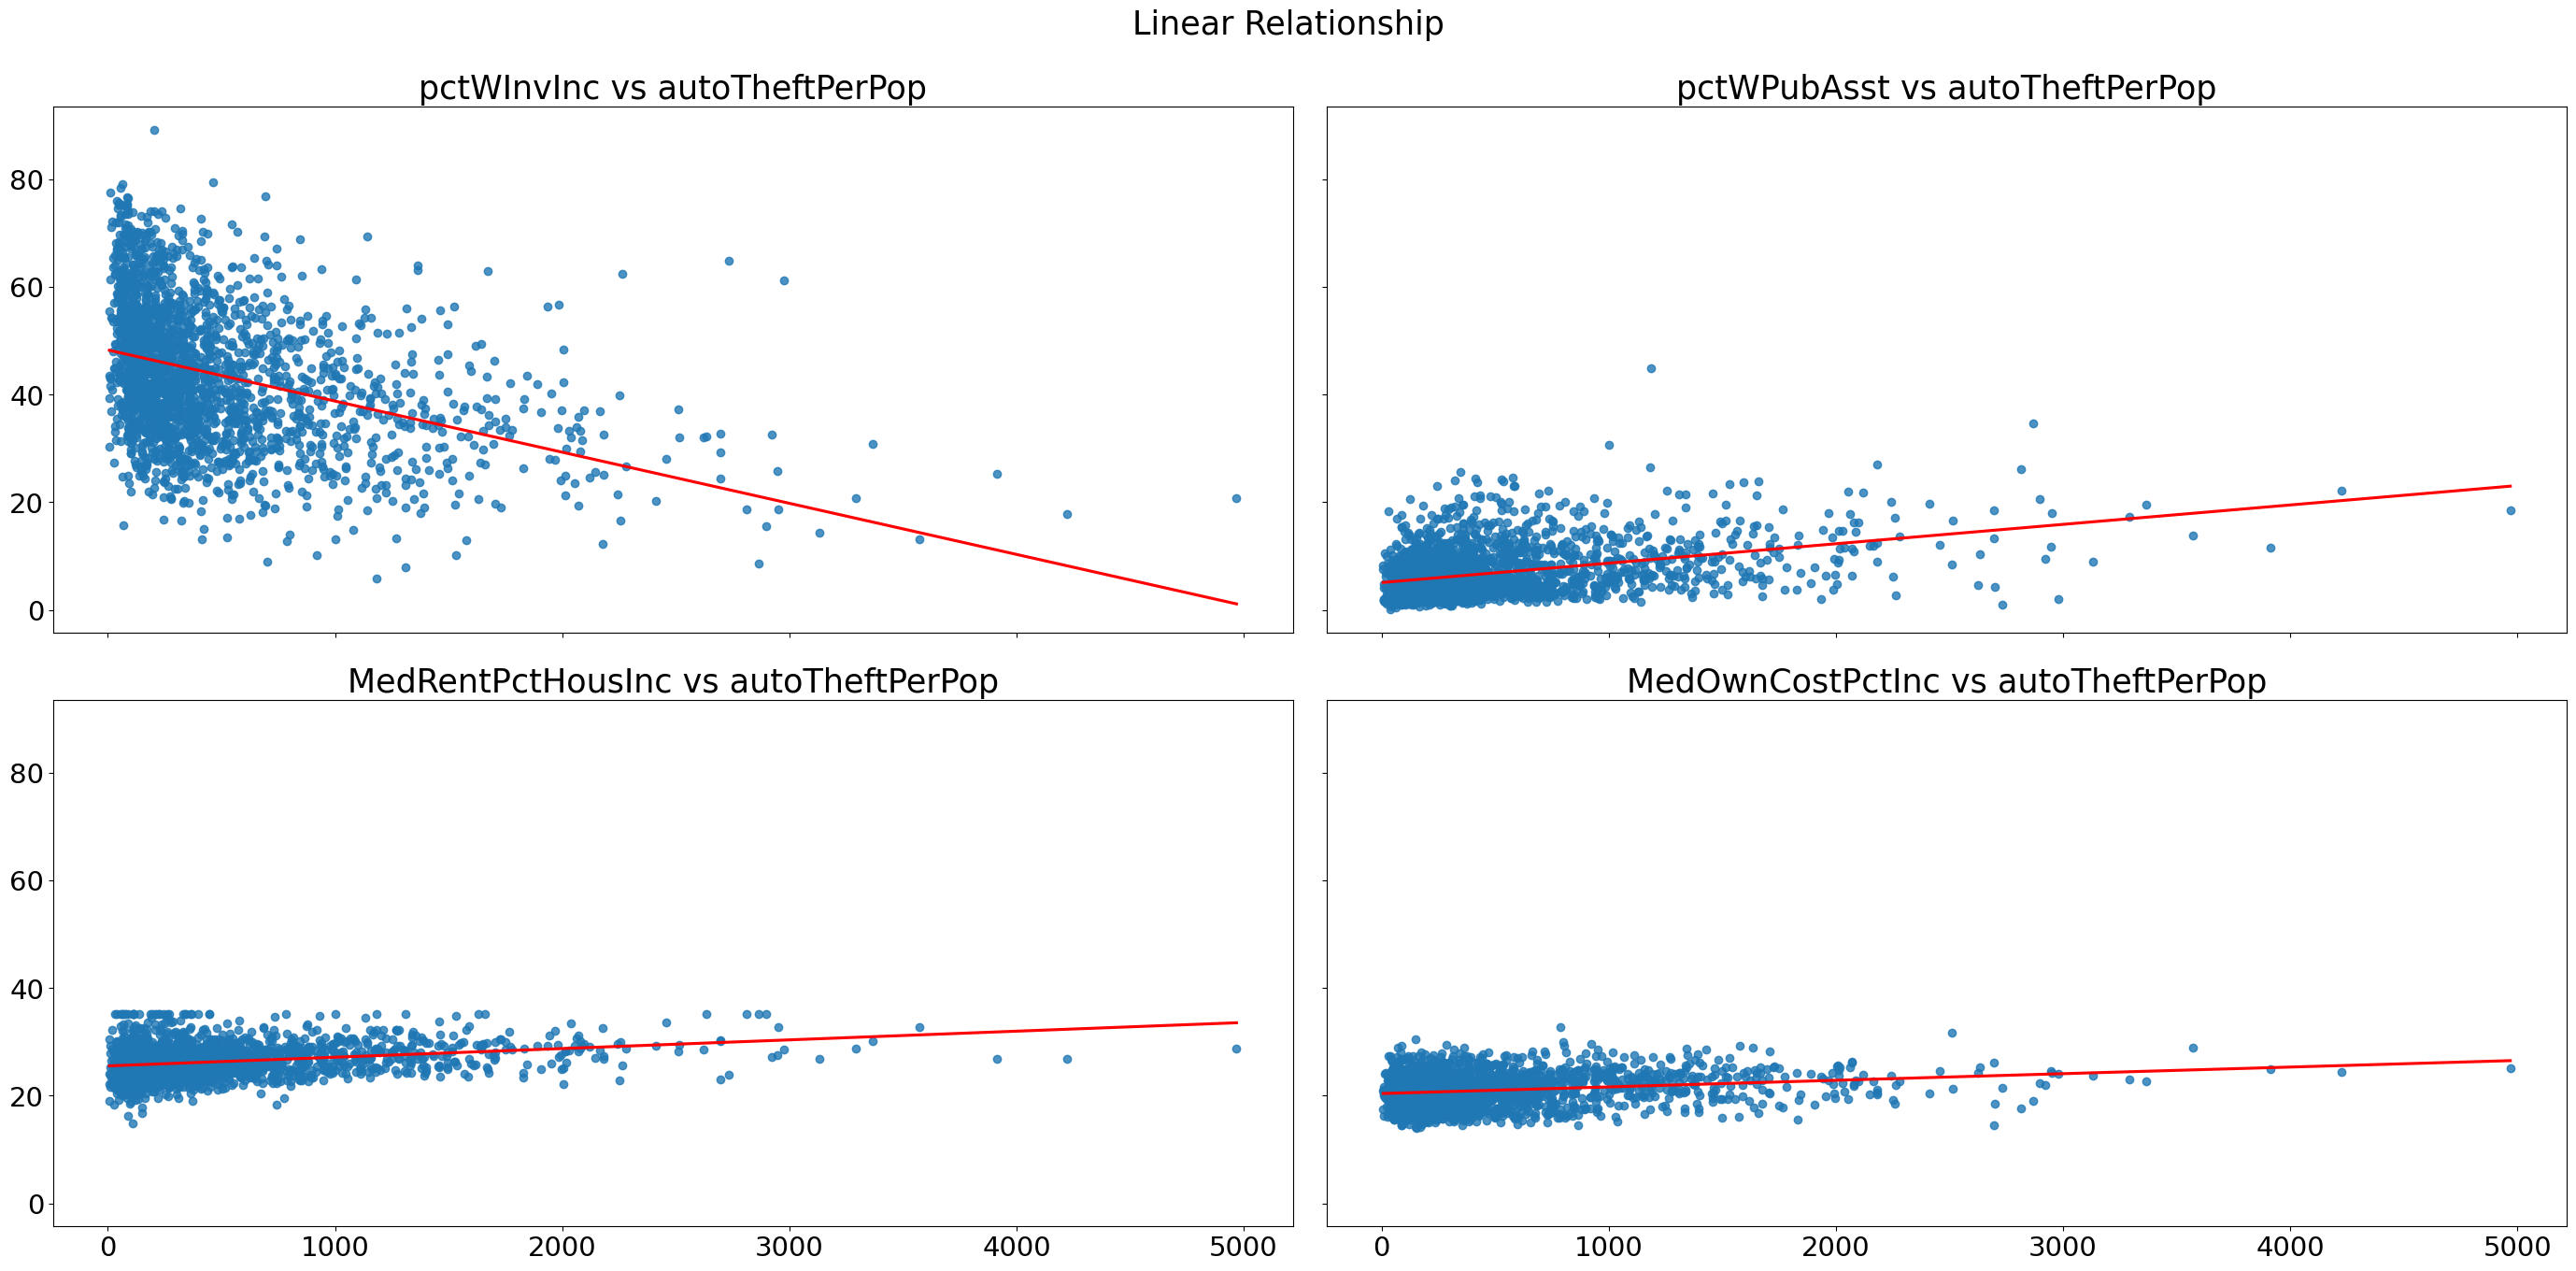

In [40]:
linear_relationship_plot(
    dataframe=crime_df,
    x="autoTheftPerPop",
    y=["pctWInvInc", "pctWPubAsst", "MedRentPctHousInc", "MedOwnCostPctInc"],
    title="Linear Relationship",
    n_rows=2,
    n_cols=2
)

## Missing Values
---

In [41]:
crime_df[crime_df["autoTheftPerPop"].isna()]

Êcommunityname state countyCode communityCode  fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumKidsBornNeverMar  PctKidsBornNeverMar  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  \
1426    Lawrencecity    MA          9         34550     7       70207           2.89          6.40         64.98          1.93        41.64        15.33        30.15        14.27       11.09      70207     100.0      22183     66.90          0.31       25.76       28.06        20.25       14.93      26398       9686        11818         7200          5301         7859       5215.0        5425        18946           27.51            21.36         43.01         9.74          14.99      51.33        34.78            19.95         23.68             17.87           11.01           40.05         16.75        14.08        3.42       49.97        44.67             55.42        51.51                51.03       59.44                 5588                10.19     14673           21.19         33.80         46.28          56.23            4.43          7.06          9.67          11.75             49.12                13.83            10.19               7.17              2.83   
1609  NewBedfordcity    MA          5         45000     8       99922           2.58          4.07         87.55          0.40         6.66        13.62        27.07        13.19       15.38      99922     100.0      22647     67.97          0.37       33.87       34.68        17.15       17.48      28373      10923        11371         8907          7942         7949       7059.0        5030        16430           16.78            31.05         50.34         9.72          12.16      52.14        27.76            20.82         25.85             16.98            9.69           32.45         13.49        11.75        3.09       63.01        60.85             66.99        68.07                58.68       66.40                 4066                 5.12     20865            7.41         12.72         18.34          23.96            1.55          2.66          3.83           5.00             60.47                10.41             4.70               3.24              2.51   
1782      Saugustown    MA          9         60015     9       25549           2.75          0.55         98.37          0.76         0.91        12.55        24.82        12.43       13.93      25549     100.0      41919     79.27          0.55       46.06       32.86         5.08       20.21      48669      17781        17704        20338         11647        32122       6020.0       11902          995            3.93             5.59         19.43        16.23           5.80      64.27        17.23            20.88         11.00             26.48            6.33           30.31          8.77         7.62        3.21       82.07        80.07             95.10        85.95                59.95       69.02                  147                 0.75      1218            2.22          4.35          8.62          11.33            0.11          0.21          0.41           0.54             92.61                 0.77             5.06               3.83              2.73   

      PersPerOwnOccHous  PersPerRentOccHous  PctPersOwnOccup  PctPersDens

- Only 3 rows with missing values so we can just drop these records 

In [42]:
crime_df = crime_df.dropna(subset=["autoTheftPerPop"])

In [43]:
crime_df[features_of_interest].isna().any()

medIncome                False
pctWWage                 False
pctWFarmSelf             False
pctWInvInc               False
pctWSocSec               False
pctWPubAsst              False
pctWRetire               False
medFamInc                False
perCapInc                False
whitePerCap              False
blackPerCap              False
indianPerCap             False
AsianPerCap              False
OtherPerCap               True
HispPerCap               False
MedRentPctHousInc        False
MedOwnCostPctInc         False
MedOwnCostPctIncNoMtg    False
dtype: bool

In [44]:
crime_df[crime_df["OtherPerCap"].isna()]

Êcommunityname state countyCode communityCode  fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumKidsBornNeverMar  PctKidsBornNeverMar  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  PersPerOwnOccHous  \
2005    Natchezcity    MS          ?             ?    10       19460           2.54         50.34         49.31          0.23          0.5         14.5        23.98        11.82       15.67          0       0.0      16769     64.79          1.04       29.73       35.04        15.81       16.21      22258      10387        14988         5876          4872        16278          NaN       17758         6051           31.79            15.56         31.12        18.69          12.38      47.77        14.39            27.69         13.11             31.42           11.68           30.57         14.89        13.49        3.12       53.27        47.08             52.64        54.68                64.71       67.96                 1923                10.44        74            9.46          9.46          9.46           9.46            0.04          0.04          0.04           0.04             98.09                 0.26             5.45               3.69              2.49               2.48   

      PersPerRentOccHous  PctPersOwnOccup  PctPersDenseHous  PctHousLess3BR  MedNumBR  HousVacant  PctHousOccup  PctHousOwnOcc  PctVacantBoarded  PctVacMore6Mos  MedYrHousBuilt  PctHousNoPhone  PctWOFullPlumb  OwnOccLowQuart  OwnOccMedVal  OwnOccHiQuart  OwnOccQrange  RentLowQ  RentMedian  RentHighQ  RentQrange  MedRent  MedRentPctHousInc  MedOwnCostPctInc  MedOwnCostPctIncNoMtg  NumInShelters  NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  murders  murdPerPop  rapes  rapesPerPop  robberies  robbbPerPop  assaults  assaultPerPop  burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
2005                 2.5            62.23              3.71           42.94         3        1000         88.45          62.36               4.0            53.2            1957            8.54            0.95           31200         45700          70000         38800        99         169        274         175      277               28.2              21.0                   15.6              0          0            0.38             79.54           61.25          87.63           92.11      13.7   1422.1            0.85                  0.0        2       10.27   15.0        76.99       36.0       184.79      54.0         277.18       283.0      1452.62     1124.0     5769.43       20.0           102.66     8.0         41.06               549.22        7365.77

In [45]:
crime_df = crime_df.dropna(subset=["OtherPerCap"])

In [46]:
X = crime_df[features_of_interest]
y = crime_df["autoTheftPerPop"]

## Baseline Model
---

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
def adjusted_r2_score(r2, n, p):
    """
    Calculate Adjusted R² Score.
    
    Parameters:
    r2 (float): The R² score.
    n (int): Number of samples.
    p (int): Number of features.
    
    Returns:
    float: The adjusted R² score.
    """
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

def evaluate_regression_models(models, X, y):
    """
    Evaluate multiple regression models and return a DataFrame with their scores.
    
    Parameters:
    models (list): List of initialized machine learning models.
    X (DataFrame): Features dataset.
    y (Series): Target dataset.
    
    Returns:
    DataFrame: A DataFrame containing model names and their scores.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize an empty list to store results
    model_scores = []

    # Number of samples and features in the test set
    n = X_test.shape[0]
    p = X_test.shape[1]

    # Loop through each model
    for model in models:
        # Get the model's name
        model_name = model.__class__.__name__

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate regression metrics
        r2 = r2_score(y_test, y_pred)
        adj_r2 = adjusted_r2_score(r2, n, p)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Append the model's metrics to the list
        model_scores.append({
            'Model': model_name,
            'R²': r2,
            'Adjusted R²': adj_r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })

    # Convert the list of scores to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    return scores_df

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

results_df = evaluate_regression_models(models, X, y)

results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4151
[LightGBM] [Info] Number of data points in the train set: 1768, number of used features: 18
[LightGBM] [Info] Start training from score 466.915068


Model        R²  Adjusted R²         MAE            MSE        RMSE
0       LinearRegression  0.335328     0.307111  280.156433  206523.466711  454.448530
1  DecisionTreeRegressor  0.053273     0.013082  325.537540  294162.096682  542.367124
2  RandomForestRegressor  0.444868     0.421301  255.279819  172487.882262  415.316605
3           XGBRegressor  0.386751     0.360717  262.830953  190545.517225  436.515197
4          LGBMRegressor  0.473874     0.451538  243.576827  163475.303473  404.320793

- Random Forest Regressor seems to do the best in R^2, mean squared error, and root mean squared error

In [111]:
import optuna

# Define the objective function for Optuna optimization
def objective(trial, X, y):
    """
    Optuna objective function for optimizing RandomForestRegressor by maximizing both
    training and test R² scores.
    
    Parameters:
    trial (Trial): An Optuna trial object to suggest hyperparameters.
    X (DataFrame): Features dataset.
    y (Series): Target dataset.
    
    Returns:
    float: A weighted sum of the train and test R² scores.
    """

    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the RandomForestRegressor model with suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate a weighted sum of the training and test R² scores
    # You can adjust the weight as per your preference (e.g., give more weight to test score)
    combined_score = 0.5 * train_r2 + 0.5 * test_r2

    # Optuna will try to maximize this score
    return combined_score

# To run the optimization
def run_optuna(X, y, n_trials=100):
    """
    Run Optuna optimization on RandomForestRegressor.
    
    Parameters:
    X (DataFrame): Features dataset.
    y (Series): Target dataset.
    n_trials (int): Number of optimization trials to run.
    
    Returns:
    study: Optuna study object with the results of the optimization.
    """
    # Create a study object for maximization
    study = optuna.create_study(direction='maximize')  # We want to maximize the combined score
    
    # Run the optimization
    study.optimize(lambda trial: objective(trial, X, y), n_trials=n_trials)
    
    # Return the study object with the results
    return study

In [112]:
study = run_optuna(X, y, n_trials=100)

# Get the best parameters from the study
print("Best parameters:", study.best_params)

# Get the best score
print("Best  score:", study.best_value)

[I 2024-10-07 22:00:55,571] A new study created in memory with name: no-name-dc82f355-be23-417f-9218-edc242d879e8
[I 2024-10-07 22:00:57,872] Trial 0 finished with value: 0.4024044997752697 and parameters: {'n_estimators': 946, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.4024044997752697.
[I 2024-10-07 22:01:00,139] Trial 1 finished with value: 0.48000665096924994 and parameters: {'n_estimators': 758, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.48000665096924994.
[I 2024-10-07 22:01:03,470] Trial 2 finished with value: 0.525805520198934 and parameters: {'n_estimators': 950, 'max_depth': 34, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.525805520198934.
[I 2024-10-07 22:01:04,632] Trial 3 finished with value: 0.6166466999730164 and parameters: {'n_estimators': 274, 'max_depth': 39, 

Best parameters: {'n_estimators': 419, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}
Best  score: 0.6880025832575632


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

tuned_model = RandomForestRegressor(**study.best_params, random_state=42)

tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=48, max_features='log2', n_estimators=419,
                      random_state=42)

In [114]:
tuned_model.score(X_train, y_train)

0.9204381251695537

In [115]:
tuned_model.score(X_test, y_test)

0.4227225221475034

# Linear Regression
---

In [116]:
# from sklearn.linear_model import LinearRegression

# lin_model = LinearRegression()
# lin_model.fit(X_train, y_train)

## Assumptions of Linear Regression
These assumptions apply to linear regression. Since we are using a random forest regressor, the only assumption that we need to worry about is multicollinearity and independence of errors. We do not need to satisfy linearity assumption because a random forest regressor can capture non-linear relationships. We do not need to satisfy normality of errors because a random forest regressor can handle skewed distributions, heteroscedasticity, and other non-normal error structures. 

But we'll test our a Linear Regression model anyways

## Assumption 1: Linearity of Variables
---
This assumption states that predictor variables must have a linear relation with the dependent variables.

In [117]:
# # train_residuals = y_train - tuned_model.predict(X_train)
# # test_residuals  = y_test  - tuned_model.predict(X_test)
# y_train_pred_lin = lin_model.predict(X_train)
# lin_model_residuals = y_train - y_train_pred_lin

In [118]:
# y_train_pred = tuned_model.predict(X_train)
# y_test_pred  = tuned_model.predict(X_test)

In [119]:
# sns.residplot(
#     x=y_train_pred_lin, 
#     y=lin_model_residuals
#     )

# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.title("Residuals vs Predicted Values")
# plt.show()

In [120]:
# plt.scatter(y_train, y_train_pred_lin, alpha=0.5)
# plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Fitted Values (Predicted)')
# plt.title('Actual vs Fitted Values')
# plt.show()



- Doesn't look like it's fitting correctly. Maybe because of that outlier above 2000 in predicted.

In [121]:
# plt.rcParams.update({"font.size":12})

In [122]:
# plt.scatter(y_test, y_test_pred, alpha=0.5)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Fitted Values (Predicted)')
# plt.title('Actual vs Fitted Values')
# plt.show()

In [123]:
# sns.residplot(
#     x=y_train_pred_lin, 
#     y=lin_model_residuals
#     )

# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.title("Residuals vs Predicted Values")
# plt.show()

In [124]:
# sns.residplot(
#     x=y_test_pred,
#     y=test_residuals
#     )

# plt.xlabel("Test Predictions")
# plt.show()

### Log Transformation of train target variable
We did log transformation because there is a pattern in the fitted values and residuals, so they aren't randomly distributed.

In [125]:
# y_train_log = np.log(y_train)
# # y_test_log  = np.log(y_test)

In [126]:
# # tuned_model.fit(X_train, y_train_log)
# lin_model.fit(X_train, y_train_log)

In [127]:
# # train_log_residuals = y_train_log - tuned_model.predict(X_train)
# # test_log_residuals  = y_test  - tuned_model.predict(X_test)
# train_log_residuals_lin = y_train_log - lin_model.predict(X_train)

In [128]:
# # y_train_log_pred = tuned_model.predict(X_train)
# # y_test_log_pred  = tuned_model.predict(X_test)
# y_train_log_pred_lin = tuned_model.predict(X_train)

In [129]:
# sns.residplot(
#     x=y_train_log_pred_lin,
#     y=train_log_residuals_lin
#     )

# plt.xlabel("Train Predictions")
# plt.show()

In [130]:
# sns.residplot(
#     x=y_test_log_pred,
#     y=test_log_residuals
#     )

# plt.xlabel("Test Predictions")
# plt.show()

## Assumption 2: Normality Distribution of error
---
Residuals should be normally distributed

In [131]:
# sns.histplot(train_log_residuals_lin, kde=True)
# plt.show()

In [132]:
# import scipy.stats as stats
# import pylab
# stats.probplot(train_log_residuals_lin, dist="norm", plot=pylab)
# pylab.show()

In [133]:
# import statsmodels.stats.api as sms
# import statsmodels.api as sm
# sm.qqplot(train_log_residuals_lin)
# pylab.show()

In [134]:
# sns.kdeplot(
#     x=train_log_residuals_lin
# )

In [135]:
# sns.violinplot(
#     x=train_log_residuals_lin
# )

# plt.show()

## Assumption 3: Homoscedasticity
---
Residuals must be homoscedastic, meaning they must be symmetrically distributed across the regression line.

In [136]:
# from statsmodels.stats.diagnostic import het_white
# from statsmodels.compat import lzip

# name = ["F statistic", "p-value"]

# test = sms.het_goldfeldquandt(y_train_log, X_train)

# lzip(name, test)

- The p-value is greater than 0.05 so we fail to reject homoscedasticity.

## Assumption 4: No multicollinearity
---
The more correlated the variable is with other regressors, With Variance Inflation Factor (VIF) 

In [137]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [138]:
# X_backup = X.copy()

In [139]:
# X = X.drop("medFamInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [140]:
# X = X.drop("perCapInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [141]:
# X = X.drop("pctWWage", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [142]:
# X = X.drop("MedRentPctHousInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [143]:
# X = X.drop("MedOwnCostPctIncNoMtg", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [144]:
# X = X.drop("medIncome", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [145]:
# X = X.drop("pctWInvInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [146]:
# X = X.drop("pctWRetire", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [147]:
# X = X.drop("MedOwnCostPctInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [148]:
# X = X.drop("whitePerCap", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [149]:
# X = X.drop("perCapInc", axis=1)

# vif_series = pd.Series(
#     [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
#     index=X.columns,
#     dtype=float
# )

# print(f"VIF Sores: \n\n{vif_series}\n")

In [150]:
# lin_model_1 = LinearRegression(fit_intercept=True)

In [151]:
# lin_model_1.fit(X_train, y_train_log)

In [152]:
# lin_model_1.score(X_train, y_train)

In [153]:
# lin_model_1.score(X_test, y_test)

- Linear Regression is underperforming (negative R^2 score), so we are not going to use it. We will go back to using the model that scored the best which was Random Forest Regressor.

# Random Forest Regressor
---
- The assumptions for Random Forest Regression are not the same as linear regression
- We still might need to remove multicollinearity for random forest regressor and the independence of errors.
- RFR can handle non-linear relationships, it can handle skewed distributions so we don't need to check the normality of errors, and it is robust to varying variance levels in the data, so we don't need to check for Homoscedasticity.
- Since we already checked the correlation and every correlation is below 0.8 or above -0.8, then we don't have to do anything for multicollinearity for a random forest regressor. RFR will handle it, so we can keep our features of interest, instead of drop them with VIF or PCA.

In [154]:
# X_train, X_test, y_train, y_test = train_test_split(X_backup, y, test_size=0.2, shuffle=True, random_state=42)

In [155]:
tuned_model.score(X_train, y_train) 

0.9204381251695537

In [156]:
tuned_model.score(X_test, y_test) 

0.4227225221475034

- Our model is not overfit, so that's good.
- Our test score is kind of low, so we need to fix something.
- We might need to rebalance the data, but this is mostly a regression problem. So, we can transform the target variable using log, square root, or box cox, or we can resample the data, but we might lose valuable information or over represent certain data points, or we can use a weighted loss function, or maybe quantile regression, or a custom loss function. 
- Another idea we might do is bagging regression so we can leverage the pros of other models. 

In [157]:
# model_accs = []

# for idx, tree in enumerate(tuned_model.estimators_):
#     score = tree.score(X_test, y_test)
#     model_accs.append([idx, score])

# model_accs = np.array(model_accs)

d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\ANNACONDA\projects\crime_project\venv\Lib\site-

In [158]:
# sorted_indices = np.argsort(model_accs[:, 1])[::-1]
# model_ids = model_accs[sorted_indices][:, 0].astype(int)

In [159]:
# tuned_model.estimators_ = np.array(tuned_model.estimators_)[model_ids].tolist()

In [177]:
feature_importance = tuned_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

features_df = features_df.sort_values(by="Importance", ascending=False)

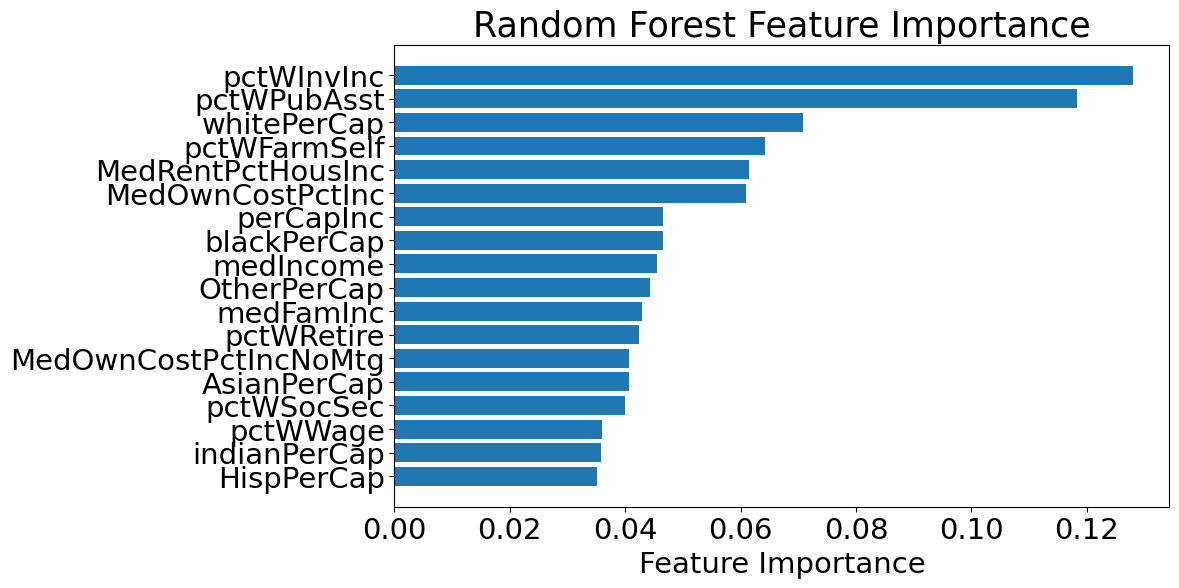

In [178]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

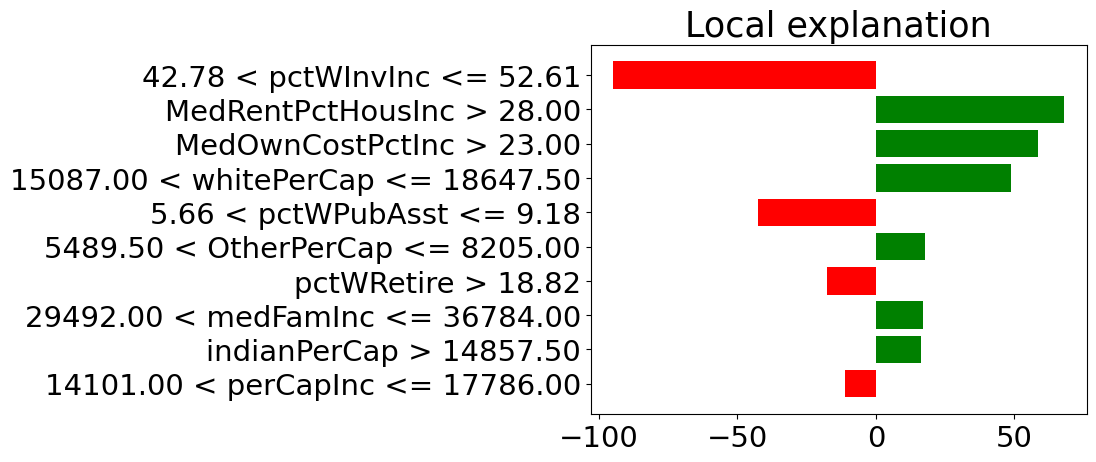

In [196]:
from lime.lime_tabular import LimeTabularExplainer

# Assuming X_train and X_test are your data and model is your trained model
explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=features_of_interest, mode='regression')

# Explain a single instance from the test set
i = 10  # Index of the instance you want to explain
exp = explainer.explain_instance(X_test.iloc[i], tuned_model.predict)

# Display the explanation in readable format
# exp.show_in_notebook()


# Use as_pyplot_figure to get the explanation as a matplotlib figure
fig = exp.as_pyplot_figure()

# Show the plot
plt.show()

In [197]:
exp.show_in_notebook()

In [161]:
# import copy

# result = []

# total_models = len(tuned_model.estimators_)

# for k in range(2, total_models):
#     # create copy of current model
#     small_model = copy.deepcopy(tuned_model)

#     # set its trees to first 'k' trees of original model
#     small_model.estimators_ = tuned_model.estimators_[:k]

#     # compute the score 
#     score = small_model.score(X_test, y_test)
#     result.append([k, score])

In [162]:
# small_model.score(X_test, y_test)

0.42259233909341076

Partial Dependency Plots (PDP) is the average effect of varying the feature value. This helps us go beyong simple confidence intervals and dive into the relationship between specific features and a model's predictions, and how the model makes its predictions.

In [163]:
# feature_values = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), num=10)
# feature_values

array([  8866.,  21617.,  34368.,  47119.,  59870.,  72621.,  85372.,
        98123., 110874., 123625.])

In [164]:
# # duplicate data set
# X_new = np.tile(X, (len(feature_values), 1))
# X_new

array([[7.5122e+04, 8.9240e+01, 1.5500e+00, ..., 2.3800e+01, 2.1100e+01,
        1.4000e+01],
       [4.7917e+04, 7.8990e+01, 1.1100e+00, ..., 2.7600e+01, 2.0700e+01,
        1.2500e+01],
       [3.5669e+04, 8.2000e+01, 1.1500e+00, ..., 2.4100e+01, 2.1700e+01,
        1.1600e+01],
       ...,
       [2.7182e+04, 5.9790e+01, 5.1000e-01, ..., 3.0500e+01, 2.3900e+01,
        1.3100e+01],
       [1.9899e+04, 7.1670e+01, 1.7000e+00, ..., 2.6200e+01, 2.3300e+01,
        1.4100e+01],
       [2.3287e+04, 6.8890e+01, 1.2000e+00, ..., 3.0900e+01, 2.1200e+01,
        1.1600e+01]])

In [165]:
# # replace selected feature
# X_new[:, 0] = np.repeat(feature_values, X.shape[0])

In [167]:
# predictions = tuned_model.predict(X_new)
# predictions

d:\ANNACONDA\projects\crime_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([ 325.85954654,  262.02921241,  370.1602864 , ...,  566.55890215,
        613.78372315, 1062.88840095])

In [168]:
# # Reshape predictions to match the number of feature values and samples
# predictions = predictions.reshape(len(feature_values), X.shape[0])

# # Average the predictions for each feature value
# pdp = np.mean(predictions, axis=1)
# pdp

array([544.6305716 , 533.09285068, 515.13999915, 499.13774756,
       484.26345759, 483.93660035, 485.10473014, 484.73538505,
       484.82307424, 484.81406022])

In [169]:
# # Step 2: Loop through all features and compute ICE and PDP
# n_features = X.shape[1]

# for feature_index in range(n_features):
#     # Define the range of values for the chosen feature
#     feature_values = np.linspace(X.iloc[:, feature_index].min(), X.iloc[:, feature_index].max(), num=10)

#     # Modify the dataset for each feature value
#     X_new = np.tile(X, (len(feature_values), 1))  # Duplicate dataset
#     X_new[:, feature_index] = np.repeat(feature_values, X.shape[0])  # Replace selected feature

#     # Generate predictions for all instances
#     predictions = tuned_model.predict(X_new)
#     predictions = predictions.reshape(len(feature_values), X.shape[0])  # Reshape to (10, 1000)

#     # Compute the PDP (average of the predictions)
#     pdp = np.mean(predictions, axis=1)

#     # Plot ICE lines for the feature
#     plt.figure(figsize=(8, 6))
#     for i in range(X.shape[0]):
#         plt.plot(feature_values, predictions[:, i], color='lightgray', lw=0.5, alpha=0.6)

#     # Overlay the PDP (average line)
#     plt.plot(feature_values, pdp, color="red", lw=3, label='PDP (Average)')

#     # Customize plot
#     plt.title(f"PDP for Feature-{X.columns.tolist()[feature_index]}", fontsize=14)
#     plt.xlabel(f"Feature-{X.columns.tolist()[feature_index]} Values", fontsize=12)
#     plt.ylabel("Predicted Outcome", fontsize=12)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [172]:
# from sklearn.inspection import PartialDependenceDisplay

# PartialDependenceDisplay.from_estimator(
#     tuned_model,
#     X,
#     features=[0]
# )

In [173]:
# PartialDependenceDisplay.from_estimator(
#     tuned_model,
#     X,
#     kind="both",
#     features=[2]
# )